In [1]:
# !pip3 install nltk
# !pip3 install Sastrawi
# !pip3 install wordcloud
import pandas as pd
import numpy as np
import os
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
pd.set_option('display.max_columns', 50)

## Load Key Norm into RAM

In [2]:
PATH_TO_KEY_NORM_FILE = './dictionary/key_norm.csv'

key_norm = pd.read_csv(PATH_TO_KEY_NORM_FILE).drop(['_id'], axis=1)
key_norm.head()

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [3]:
key_norm_dict = {key_norm['singkat'][i]:key_norm['hasil'][i] for i in range(len(key_norm))}
key_norm_dict

{'abis': 'habis',
 'accent': 'tekanan',
 'accept': 'terima',
 'accident': 'kecelakaan',
 'achievement': 'prestasi',
 'acra': 'acara',
 'acrany': 'acaranya',
 'acrnya': 'acaranya',
 'action': 'aksi',
 'active': 'aktif',
 'activity': 'aktivitas',
 'actually': 'sebenarnya',
 'actualy': 'sebenarnya',
 'ad': 'ada',
 'ade': 'ada',
 'adult': 'dewasa',
 'adventure': 'petualangan',
 'adventurer': 'petualang',
 'advice': 'nasehat',
 'after': 'setelah',
 'afternun': 'sore',
 'again': 'lagi',
 'agency': 'perwakilan',
 'agent': 'agen',
 'agk': 'agak',
 'agktn': 'angkatan',
 'agree': 'setuju',
 'agreement': 'persetujuan',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'aje': 'saja',
 'ajeh': 'saja',
 'ajk': 'ajak',
 'ak': 'saya',
 'akeh': 'banyak',
 'akhire': 'akhirnya',
 'aktifkn': 'aktifkan',
 'aku': 'saya',
 'alhamdlh': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'almost': 'hampir',
 'almt': 'alamat',
 'alone': 'sendiri',
 'alsn': 'alasan',
 'also': 'juga',
 'always': '

## Read Data

In [32]:
## Hard coded constants for locating the inputs
PATH_TO_NEW_SENTIMENT_FOLDER = './'
NEGATIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'negative_tweet_progress_iv.csv'
POSITIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'positive_tweet_progress_iv.csv'

In [33]:
negative_data = pd.read_csv(NEGATIVE_DATASET)
positive_data = pd.read_csv(POSITIVE_DATASET)

In [34]:
negative_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url',
       'Unnamed: 0.1.1.1', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [35]:
positive_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url',
       'Unnamed: 0.1.1.1', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [36]:
negative_data['is_depressed'] = True
print(negative_data.count())
negative_data.head()

Unnamed: 0           357
Unnamed: 0.1         357
Unnamed: 0.1.1       119
id                   357
conversation_id      357
created_at           357
date                 357
time                 357
timezone             357
user_id              357
username             357
name                 357
place                0  
tweet                357
mentions             125
urls                 357
photos               357
replies_count        357
retweets_count       357
likes_count          357
location             0  
hashtags             357
link                 357
retweet              0  
quote_url            2  
video                300
profile_image_url    300
Unnamed: 0.1.1.1     0  
gif_thumb            0  
gif_url              0  
has_parent_tweet     57 
is_quote_status      57 
is_reply_to          57 
quote_id             57 
replies              57 
tags                 57 
video_thumb          0  
video_url            0  
is_depressed         357
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,0.0,1127948727660961792,1127946700813770752,1557758907000,2019-05-13,21:48:27,WIB,1118865253305999360,xxdhean,BUNDANYA BYOUNGGON ☄,NaN,"Hari selasa babe YG bikin ""new line up"" gue misuh misuh, mikirin perasaannya gon. Gimana kalo gue ada di keadaan dia yang serba salah kaya raisa gitu. Gue sih hopeless pengen bunuh diri T_T",NaN,[],[],1,0,0,NaN,[],https://twitter.com/xxdhean/status/1127948727660961792,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1126983737726554112/hUh8FMF_.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1,1,3.0,1127896201230032896,1127896201230032896,1557746384000,2019-05-13,18:19:44,WIB,80029283,raishaula,Raisha Ula,NaN,"Brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma.... ""yah terserah, hidup2 kamu"" Sumpah rasanya pengen bunuh diri tau....",NaN,[],[],1,0,0,NaN,[],https://twitter.com/raishaula/status/1127896201230032896,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1105910672494288896/QBKquzDq.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2,2,4.0,1127885187461697537,1127883684994899968,1557743758000,2019-05-13,17:35:58,WIB,710061963175309312,bung_tahu,Look,NaN,Ada ga ya twitternya bili... Pengen bilangin doang bahwa gue ga ngurus dan ga peduli billy mau nikah... Mau mati.... Atau mau bunuh diri... Yg gue tunggu2... Billy jd sampah masyarakat saja karena ga berbakat muncul di tipi,['vivacoid'],[],[],0,0,0,NaN,[],https://twitter.com/Bung_tahu/status/1127885187461697537,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1127896513009471489/ah2Xbl68.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,3,3,5.0,1127852789374144512,1127852789374144512,1557736034000,2019-05-13,15:27:14,WIB,2791266684,au_ah_elap06,GATAUAH,NaN,"Gw sama kaya ka karin ngerti ttng depresi pas kls 1 smk, sering bngt pengen bunuh diri, serasa ga berguna bngt didunia, terus gw dkt sama Allah dan emng bener gw jadi tenang tapi ttp aja gw butuh orang buat mensupport! Dan sampe skrng blm sempet ke psikologi T_T https://twitter.com/awkarin/status/1127400518383366144 …",NaN,['https://twitter.com/awkarin/status/1127400518383366144'],[],0,0,0,NaN,[],https://twitter.com/AU_AH_ELAP06/status/1127852789374144512,NaN,https://twitter.com/awkarin/status/1127400518383366144,0.0,https://pbs.twimg.com/profile_images/1122516287639285761/i2hOfWNx.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,4,4,6.0,1127793687516336129,1127793687516336129,1557721943000,2019-05-13,11:32:23,WIB,1047208017064689664,askfess,ASKFESS,NaN,#mnfs tb² pengen bunuh diri,NaN,[],[],25,0,5,NaN,['#mnfs'],https://twitter.com/askfess/status/1127793687516336129,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1095868225353478145/OgXxj9gc.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [37]:
positive_data['is_depressed'] = False
print(positive_data.count())
positive_data.head()

Unnamed: 0           478
Unnamed: 0.1         478
Unnamed: 0.1.1       133
id                   478
conversation_id      478
created_at           478
date                 478
time                 478
timezone             478
user_id              478
username             478
name                 478
place                0  
tweet                478
mentions             277
urls                 478
photos               478
replies_count        478
retweets_count       478
likes_count          478
location             0  
hashtags             478
link                 478
retweet              0  
quote_url            9  
video                309
profile_image_url    309
Unnamed: 0.1.1.1     0  
gif_thumb            0  
gif_url              0  
has_parent_tweet     169
is_quote_status      169
is_reply_to          169
quote_id             169
replies              169
tags                 169
video_thumb          0  
video_url            0  
is_depressed         478
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai? Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127935635400957954,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/896707936008810496/axlDn_bp.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏 pic.twitter.com/eR3YQnXrRO,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont.jpg'],1,0,0,NaN,[],https://twitter.com/LVLIA00/status/1127933327736881152,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1124230039678021633/_dRnoVSf.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bunuh diri yang rugi dikamu jugaaa:) hilangin pikiran itu okeee, banyak yg sayang sama kamu banyak yang masih pengen lihat kamu. jangan pernah menyeraaah, ingat banyak orang yg pengen melanjutkan hidup! semangaaat!!!",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/1127650851529453568,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1127841278299762689/WuaYEFfS.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aja ga bunuh diri. Pengen tau ketika di tangkap nnt,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', 'guecebongs', '4y4nkz', '_______b1g__k4y', 'ariantobulolo', 'badjanuswantara', 'nanedianti', '99armyk', 'alin7_11', 'andyarch77', 'darmogaty', 'anto_winarno']",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/1127262863112974338,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1046423512347340800/Y1Esmd01.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/1126894271368314882,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1126065348715765760/Bpurh_pM.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [38]:
data = pd.DataFrame(positive_data,)
data = data.append(negative_data)
print(data.count())
data.head()

Unnamed: 0           835
Unnamed: 0.1         835
Unnamed: 0.1.1       252
id                   835
conversation_id      835
created_at           835
date                 835
time                 835
timezone             835
user_id              835
username             835
name                 835
place                0  
tweet                835
mentions             402
urls                 835
photos               835
replies_count        835
retweets_count       835
likes_count          835
location             0  
hashtags             835
link                 835
retweet              0  
quote_url            11 
video                609
profile_image_url    609
Unnamed: 0.1.1.1     0  
gif_thumb            0  
gif_url              0  
has_parent_tweet     226
is_quote_status      226
is_reply_to          226
quote_id             226
replies              226
tags                 226
video_thumb          0  
video_url            0  
is_depressed         835
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai? Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127935635400957954,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/896707936008810496/axlDn_bp.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏 pic.twitter.com/eR3YQnXrRO,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont.jpg'],1,0,0,NaN,[],https://twitter.com/LVLIA00/status/1127933327736881152,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1124230039678021633/_dRnoVSf.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bunuh diri yang rugi dikamu jugaaa:) hilangin pikiran itu okeee, banyak yg sayang sama kamu banyak yang masih pengen lihat kamu. jangan pernah menyeraaah, ingat banyak orang yg pengen melanjutkan hidup! semangaaat!!!",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/1127650851529453568,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1127841278299762689/WuaYEFfS.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aja ga bunuh diri. Pengen tau ketika di tangkap nnt,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', 'guecebongs', '4y4nkz', '_______b1g__k4y', 'ariantobulolo', 'badjanuswantara', 'nanedianti', '99armyk', 'alin7_11', 'andyarch77', 'darmogaty', 'anto_winarno']",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/1127262863112974338,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1046423512347340800/Y1Esmd01.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/1126894271368314882,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/1126065348715765760/Bpurh_pM.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Preprocessing Data

In [39]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

import re

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
 
# Tambahkan Stopword Baru
stop_words = stop_factory.get_stop_words()+more_stopword

# Create StopWord Removal using our own Stop words
stop_word_remover = StopWordRemover(ArrayDictionary(stop_words))

# Create stemmer
stemmer = StemmerFactory().create_stemmer()

def formalize(word):
    if word in key_norm_dict:
        return key_norm_dict[word]
    return word

def preprocess_tweet(tweet, debug = False):
    if debug: print(tweet, end="\n\n")
    
    # Lower casing
    clean_tweet = tweet.lower() #lowercase
    
    # URL Removal and Username removal
    clean_tweet = re.sub(r"(?:\@|https?\://)\S+", " ", clean_tweet)
    if debug: print('After URL and username removal: ', clean_tweet, end="\n\n")
    
    # Punctuation removal
    clean_tweet = re.sub(r'[^\w\s]',' ',clean_tweet)
    if debug: print('After punctuation removal: ', clean_tweet, end="\n\n")
    
    # Extra space removal
    clean_tweet = re.sub('\s+', ' ', clean_tweet)
    if debug: print('After extra space removal: ', clean_tweet, end="\n\n")
    
     # Trimming
    clean_tweet = clean_tweet.strip()
    if debug: print('After trimming: ', clean_tweet)
         
    # Transforming informal words to formal words
    clean_tweet = " ".join([formalize(word) for word in word_tokenize(clean_tweet)])
    if debug: print('After transofrming informal words: ', clean_tweet, end="\n\n")
     
    # Stop words removal
    clean_tweet = stop_word_remover.remove(clean_tweet)
    if debug: print('After stop words removal: ', clean_tweet, end="\n\n")
    
    # Stemming
    clean_tweet = stemmer.stem(clean_tweet)
    if debug: print('After stemming: ', clean_tweet, end="\n\n")
    
    if debug: print()
    
    return clean_tweet

In [40]:
cleaned = []
for idx, tweet in enumerate(data['tweet']):
    print('{}/{}'.format(idx, len(data['tweet'])))
    cleaned.append(preprocess_tweet(tweet, True))
    print()
    
cleaned

0/835
Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai?  Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?

After URL and username removal:  disadari atau tidak kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai?  bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip 😅 seru kan?

After punctuation removal:  disadari atau tidak kadang apa yg kita lihat sebagai  kerusakan    penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai   bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip   seru kan 

After extra space removal:  disadari atau tidak kadang apa yg kita lihat sebagai kerusakan penyimpangan itu sebenarnya karena ulah kita

After stemming:  pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri



8/835
tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After URL and username removal:  tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After punctuation removal:  tangkap    jgn pernah diliput media pengen terkenal dgn cara bunuh diri kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan  inget ye    surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After extra space removal:  tangkap jgn pernah diliput media pengen terkenal dgn cara

After stemming:  jaman sekarang teroris kejahatanya bukan teror kaya bom bunuh diri bawa kabur lembar c1 tertawa takut lemes habis cair kamibersamafpi pic twitter com 9h6hok8owh



14/835
" seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"

After URL and username removal:  " seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"

After punctuation removal:    seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After extra space removal:   seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After trimming:  seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga
After transofrming informal words:  seorang pemuda nekad melakukan aksi bunuh diri karena ingin cpat2 masuk surga

After stop words removal:  seorang pemuda nekad melakukan aksi bunuh diri ingin cpat2 masuk surga

After stemming:  orang pemuda nekad laku aksi bunuh diri ingin cpat2 masuk surga



15/

After stemming:  kesel tingkat dewa zeus ketika nonton bioskop pas jalan lobby studio ketemu orang baru kelar nonton eh sedih iron man nya mati walah gustiiiii tidak suek suek tiket



20/835
Pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After URL and username removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After punctuation removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After extra space removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After trimming:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm
After transofrming informal words:  ingin bilang sedih kali karena ironman mati tapi tidak dibolehin spoiler hmm

After stop words removal:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm

After stemming:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm



21/835
Nonton #Possessed di Nexflix itu: Ep

After stemming:  terus tadi cerita emaknya datang tuh lihat anak mati minta sama mungkin kalau manusia ngomong dong anak kenapa natap terus sambil meong2 begitu sedih lah tokay banget kucing garong



27/835
Sedih denger berita di tv ada KPPS skitar 103 orng yg meninggal akibat kelalahan.  Gw dlam hati pengen gitu dnger kabar NETIZEN MATI AKIBAT KELELAHAN NGEEBACOOT tntng pilpres.  Kalo udah nyoblos yaa udaah. Kmu kira bacotmu di sosmed bisa ngubah nasib negara ? Goooblwuok.

After URL and username removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan.  gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres.  kalo udah nyoblos yaa udaah. kmu kira bacotmu di sosmed bisa ngubah nasib negara ? goooblwuok.

After punctuation removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan   gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres   kalo uda

After stemming:  iya muka bule menang banget postur pas ahh sedih kalau ingat 16 tahun bagaimana kalau sudah masuk umur 20an mati iya sih colong bighit kan niat masih ingin nyembunyiin



32/835
Akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. Trus pasang di social media seeeolaaaah dianyaa pahlawaan. Uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After URL and username removal:  akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. trus pasang di social media seeeolaaaah dianyaa pahlawaan. uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After punctuation removal:  akuuu jugaaaa dapet yg begituaaan  dateng ke site aku  pake baju sobek2  nyeker alias barefoot  foto muke sedih ama hiu mati     trus pasang di social media seeeolaaaah dianyaa pahlawaan  uda pengen aku lempar pake hiu mati yg gedenya 2 meter 

After ext

After stemming:  lagu yura harus bahagia moodbooster banget yak malam



40/835
Hati yg patah mata yg basah semua punya hikmah , semoga bahagia selalu 🙏

After URL and username removal:  hati yg patah mata yg basah semua punya hikmah , semoga bahagia selalu 🙏

After punctuation removal:  hati yg patah mata yg basah semua punya hikmah   semoga bahagia selalu  

After extra space removal:  hati yg patah mata yg basah semua punya hikmah semoga bahagia selalu 

After trimming:  hati yg patah mata yg basah semua punya hikmah semoga bahagia selalu
After transofrming informal words:  hati yang patah mata yang basah semua punya hikmah semoga bahagia selalu

After stop words removal:  hati patah mata basah semua punya hikmah semoga bahagia selalu

After stemming:  hati patah mata basah semua punya hikmah moga bahagia selalu



41/835
Tiap hari absurd:)  Pas nge mos adek kelas, setelah selesai kan masih stay di sekolah. Pada janjian batalin puasa dan manjat pohon jambu disekolah buat bukaan.  Ya

After trimming:  aku hanya ingin mendapatkan hak ku hak ku untuk bahagia dan merasakan cinta tulus darimu sayang
After transofrming informal words:  saya hanya ingin mendapatkan hak ku hak ku untuk bahagia dan merasakan cinta tulus darimu sayang

After stop words removal:  hanya mendapatkan hak ku hak ku bahagia merasakan cinta tulus darimu sayang

After stemming:  hanya dapat hak ku hak ku bahagia rasa cinta tulus dari sayang



49/835
Bagus dong. Berarti bahagia kamu sederhana

After URL and username removal:  bagus dong. berarti bahagia kamu sederhana

After punctuation removal:  bagus dong  berarti bahagia kamu sederhana

After extra space removal:  bagus dong berarti bahagia kamu sederhana

After trimming:  bagus dong berarti bahagia kamu sederhana
After transofrming informal words:  bagus dong berarti bahagia kamu sederhana

After stop words removal:  bagus dong berarti bahagia kamu sederhana

After stemming:  bagus dong arti bahagia kamu sederhana



50/835
Yg gede mobi, yg item

After stemming:  asha sedikit kibas rambut belakang lihat sedikit sombong iya asha oh jangan salah kalau asha bangun siang lebih bahagia asal jangan pas hari sekolah



58/835
Aku doa aja  Semoga kita BAHAGIA SELALUU

After URL and username removal:  aku doa aja  semoga kita bahagia selaluu

After punctuation removal:  aku doa aja  semoga kita bahagia selaluu

After extra space removal:  aku doa aja semoga kita bahagia selaluu

After trimming:  aku doa aja semoga kita bahagia selaluu
After transofrming informal words:  saya doa saja semoga kita bahagia selaluu

After stop words removal:  doa semoga bahagia selaluu

After stemming:  doa moga bahagia selaluu



59/835
Seburuk apa pun masa silam kita, kita berhak utk berubah dan mendapat kebahagiaan. Semua orang layak utk bahagia. Jadi berhentilah utk bersedih. Percayalah satu saat kau akan lebih bahagia cuma kunci utk bahagia adalah SABAR.

After URL and username removal:  seburuk apa pun masa silam kita, kita berhak utk berubah dan mend

After stemming:  kopi i butuh kopi pait nih nanti ngantuk



68/835
Belum ngantuk nih ):

After URL and username removal:  belum ngantuk nih ):

After punctuation removal:  belum ngantuk nih   

After extra space removal:  belum ngantuk nih 

After trimming:  belum ngantuk nih
After transofrming informal words:  belum ngantuk nih

After stop words removal:  ngantuk nih

After stemming:  ngantuk nih



69/835
BD AMAD U NGANTUK YA 😂 BENER NIH DI LAKBAN??? BENER KALI INI AJA Y

After URL and username removal:  bd amad u ngantuk ya 😂 bener nih di lakban??? bener kali ini aja y

After punctuation removal:  bd amad u ngantuk ya   bener nih di lakban    bener kali ini aja y

After extra space removal:  bd amad u ngantuk ya bener nih di lakban bener kali ini aja y

After trimming:  bd amad u ngantuk ya bener nih di lakban bener kali ini aja y
After transofrming informal words:  bd amad kamu ngantuk ya bener nih di lakban bener kali ini saja y

After stop words removal:  bd amad kamu ngantuk be

After stemming:  dengerin musik nih nunggu ngantuk kamu



85/835
Pas lagi kerja : "ngantuk, balik enak nih langsung tidur." Pas sampe rumah : "rebahan-main sosmed-denger musik-ngestalk-ketawaketiwi sampe tengah malem."  Besoknya telat ngampus karna mager banget mau bangun😞

After URL and username removal:  pas lagi kerja : "ngantuk, balik enak nih langsung tidur." pas sampe rumah : "rebahan-main sosmed-denger musik-ngestalk-ketawaketiwi sampe tengah malem."  besoknya telat ngampus karna mager banget mau bangun😞

After punctuation removal:  pas lagi kerja    ngantuk  balik enak nih langsung tidur   pas sampe rumah    rebahan main sosmed denger musik ngestalk ketawaketiwi sampe tengah malem    besoknya telat ngampus karna mager banget mau bangun 

After extra space removal:  pas lagi kerja ngantuk balik enak nih langsung tidur pas sampe rumah rebahan main sosmed denger musik ngestalk ketawaketiwi sampe tengah malem besoknya telat ngampus karna mager banget mau bangun 

After trimming:  

After stemming:  jeno jaemin senang banget temu botol plastik gunung sampah ampun tidak bau apa cuma nonton rasa di ujung hidung bau tumpu sampah truk angkut sampah lewat depan saja sudah tidak tahan sampai ngorek2 salut sama



91/835
Ya Allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After URL and username removal:  ya allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After punctuation removal:  ya allah shock therapy banget malem malem    tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After extra space removal:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After trimming:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw
After transofrming informal words:  ya allah shock therapy banget malam malam tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After stop words removal:  allah shock therapy banget malam malam ku senan

After stemming:  orang instagram upload habis senang senang terus nulis caption pura pura bahagia padahal mah bahagia banget awokwkwokkawok



100/835
Seneng banget ga boong

After URL and username removal:  seneng banget ga boong

After punctuation removal:  seneng banget ga boong

After extra space removal:  seneng banget ga boong

After trimming:  seneng banget ga boong
After transofrming informal words:  senang banget tidak bohong

After stop words removal:  senang banget bohong

After stemming:  senang banget bohong



101/835
Apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. Sebetulnya gue seneng karena dia orangnya emang pejuang banget, and she deserves to be a pioneer in our batch. Tapi miris sama diri sendiri karena makin hari makin males.

After URL and username removal:  apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. sebetulnya gue seneng karena dia orangnya

After stemming:  alhamdulillah benar temu jalan usaha indonesiamemanggilcaknun pic twitter com fdbk7p6mzc



109/835
Alhamdulillah adalah energi 🙏

After URL and username removal:  alhamdulillah adalah energi 🙏

After punctuation removal:  alhamdulillah adalah energi  

After extra space removal:  alhamdulillah adalah energi 

After trimming:  alhamdulillah adalah energi
After transofrming informal words:  alhamdulillah adalah energi

After stop words removal:  alhamdulillah energi

After stemming:  alhamdulillah energi



110/835
alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!

After URL and username removal:  alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!

After punctuation removal:  alhamdulillah ikut seneng  terharuuu bgt   semoga mamanya bisa ikut umroh bareng bapak ya  aamiin  

After extra space removal:  alhamdulillah ikut seneng terharuuu bgt semoga mamanya bisa ikut umroh 

After stemming:  banyak kecewa sama got beberapa eps akhir meanwhile kok seneng2 yah nontonnya pasti kurang sih ina inu jadi far jadi good tertawa terlalu polos jadi yang bilang aneh logis bikin kecewa apa siii saya kepo jelaskeun



119/835
Kok pada kecewa sama S08E05 GoT. B aja sih, emang gitu kali cewe mah. Wkwkwkw.

After URL and username removal:  kok pada kecewa sama s08e05 got. b aja sih, emang gitu kali cewe mah. wkwkwkw.

After punctuation removal:  kok pada kecewa sama s08e05 got  b aja sih  emang gitu kali cewe mah  wkwkwkw 

After extra space removal:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw 

After trimming:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw
After transofrming informal words:  kok pada kecewa sama s08e05 got bb saja sih emang begitu kali cewek mah wkwkwkw

After stop words removal:  kok kecewa sama s08e05 got bb sih emang kali cewek mah wkwkwkw

After stemming:  kok kecewa sama s08e05 got bb sih e

After stemming:  pantas cepat tua dih biasa kamu malu maluin cepetan sana saya kecewa woi lah bagaimana sih



128/835
Angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk

After URL and username removal:  angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk

After punctuation removal:  angkut gua bangggg dijamin ngga kecewa  kecewa bisa refund  ggg wkwk

After extra space removal:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk

After trimming:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk
After transofrming informal words:  angkut saya bangggg dijamin tidak kecewa kecewa bisa refund ggg wkwk

After stop words removal:  angkut bangggg dijamin kecewa kecewa refund ggg wkwk

After stemming:  angkut bangggg jamin kecewa kecewa refund ggg wkwk



129/835
ANJIR APAAN SIH INI EPISODE 5 #GameofThrones ????? EMOSI JIWA RAGAAAAA, KECEWA KECEWA KECEWAAAAA!!!!! 😠😠

After URL and username removal:  anjir apaan sih ini episo

After stemming:  kau hancur kan dengan sikap sadar kau sakit lelah hati sakit cinta bunuh



137/835
Kalo ngurusin aku, lelah gak? :"

After URL and username removal:  kalo ngurusin aku, lelah gak? :"

After punctuation removal:  kalo ngurusin aku  lelah gak    

After extra space removal:  kalo ngurusin aku lelah gak 

After trimming:  kalo ngurusin aku lelah gak
After transofrming informal words:  kalau mengurusi saya lelah tidak

After stop words removal:  kalau mengurusi lelah

After stemming:  kalau urus lelah



138/835
Biarlah waktu yg menjawab. Terkadang diposisi seperti ini sangatlah sulit. Harus membagi. Harus bener" adil. Tetapi disaat seperti ini?  Aku harus gimana? Lelah?  Pasti. Sabar wil masih pagi.  Kamu juga puasa. Jangan sampai pagi" kamu udah sakit. Kayak kemarin

After URL and username removal:  biarlah waktu yg menjawab. terkadang diposisi seperti ini sangatlah sulit. harus membagi. harus bener" adil. tetapi disaat seperti ini?  aku harus gimana? lelah?  pasti. sab

After stemming:  jangan lelah sadar kakak2 semuaa tetap juang mungkin ada saat saya sadar terus juang baik jangan serah



143/835
lakukan terus hingga aku lelah lalu menyerah

After URL and username removal:  lakukan terus hingga aku lelah lalu menyerah

After punctuation removal:  lakukan terus hingga aku lelah lalu menyerah

After extra space removal:  lakukan terus hingga aku lelah lalu menyerah

After trimming:  lakukan terus hingga aku lelah lalu menyerah
After transofrming informal words:  lakukan terus hingga saya lelah lalu menyerah

After stop words removal:  lakukan terus hingga lelah lalu menyerah

After stemming:  laku terus hingga lelah lalu serah



144/835
Teruslah berlari. Tapi jika kau lelah, tengoklah ke belakang. Ada aku yg selalu menantimu :')

After URL and username removal:  teruslah berlari. tapi jika kau lelah, tengoklah ke belakang. ada aku yg selalu menantimu :')

After punctuation removal:  teruslah berlari  tapi jika kau lelah  tengoklah ke belakang  ada ak

After extra space removal:  kadang kita ingin sendiri bukan karena marah melainkan saat kita ingin menenangkan hati

After trimming:  kadang kita ingin sendiri bukan karena marah melainkan saat kita ingin menenangkan hati
After transofrming informal words:  kadang kita ingin sendiri bukan karena marah melainkan saat kita ingin menenangkan hati

After stop words removal:  kadang ingin sendiri bukan marah saat ingin menenangkan hati

After stemming:  kadang ingin sendiri bukan marah saat ingin tenang hati



152/835
Jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain! Perlakukan orang lain sesuai dengan pearlakuan yang ingin anda dapatkan dari orang lain. - See more at:  http://cinta009.blogspot.com/2013/04/kata-bijak-kehidupan.html#sthash.I6mOKNAl.dpuf …

After URL and username removal:  jika anda tidak belajar mencintai diri sendiri terlebih dahulu anda tidak bisa mencintai orang lain! perlakukan orang lain sesuai dengan pearlakuan yang i

After stemming:  awal ingin tau masa lalu nya ttep nyari tau gilir tau nya apa baru sadar nyata lebih buruk sendiri i2 dia nutup in jelas lah baca isi chatnya bagaimana saya mah bukan anak paud cmn bisa kamu bohongin sakitinimah



158/835
KKSB mulu, udh jelas2 pake senjata, ingin mendirikan negara sendiri, membunuh TNI, ga disebut teroris dan makar... Logika rezim skrg 😪

After URL and username removal:  kksb mulu, udh jelas2 pake senjata, ingin mendirikan negara sendiri, membunuh tni, ga disebut teroris dan makar... logika rezim skrg 😪

After punctuation removal:  kksb mulu  udh jelas2 pake senjata  ingin mendirikan negara sendiri  membunuh tni  ga disebut teroris dan makar    logika rezim skrg  

After extra space removal:  kksb mulu udh jelas2 pake senjata ingin mendirikan negara sendiri membunuh tni ga disebut teroris dan makar logika rezim skrg 

After trimming:  kksb mulu udh jelas2 pake senjata ingin mendirikan negara sendiri membunuh tni ga disebut teroris dan makar logika rez

After stemming:  jatuh cinta sendiri buruk harap sendiri bajar cinta harap ckp laku apa ingin kamu laku tahu apa wajar tahu jangan terlalu harap temu suka suka punya ajaib sendiri perhati



165/835
Jangan berubah hanya karena ingin dicinta. Jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After URL and username removal:  jangan berubah hanya karena ingin dicinta. jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After punctuation removal:  jangan berubah hanya karena ingin dicinta  jadi dirimu sendiri  dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After extra space removal:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After trimming:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya
After transofrming in

After stemming:  zelo jadi musisi bisa tulis produksi musik sendiri



174/835
"Selalu sadar bahwa setiap orang memiliki hati. Setiap orang ingin dihargai. Setiap orang ingin dicintai.. seperti dirimu sendiri."

After URL and username removal:  "selalu sadar bahwa setiap orang memiliki hati. setiap orang ingin dihargai. setiap orang ingin dicintai.. seperti dirimu sendiri."

After punctuation removal:   selalu sadar bahwa setiap orang memiliki hati  setiap orang ingin dihargai  setiap orang ingin dicintai   seperti dirimu sendiri  

After extra space removal:   selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri 

After trimming:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri
After transofrming informal words:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri

A

After stemming:  kamu sakit sahabat pasti maaf mereka sulit tuk maaf apa kamu laku diri sendiri hampir semua orang maaf lupa terkadang tidak orang lupa kita telah maaf



180/835
Jika Anda ingin sukses, Anda harus menciptakan peluang untuk diri sendiri.

After URL and username removal:  jika anda ingin sukses, anda harus menciptakan peluang untuk diri sendiri.

After punctuation removal:  jika anda ingin sukses  anda harus menciptakan peluang untuk diri sendiri 

After extra space removal:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri 

After trimming:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri
After transofrming informal words:  jika anda ingin sukses anda harus menciptakan peluang untuk diri sendiri

After stop words removal:  sukses anda harus menciptakan peluang diri sendiri

After stemming:  sukses anda harus cipta peluang diri sendiri



181/835
Aku bangga sama kamu, dari smp sampai kuliah udah mandiri, merantau pula. Jad

After stemming:  edc semangatin dong masih ngedown gara gara nilai un jeblok banget bener2 bikin keluarga kecewa capek nangisin nilai un 50



185/835
Jadi, kira2, kapan usaha saling benci, saling tuduh dan menjatuhkan ini itu selesai? Nunggu kalian damai kayaknya ngga kelar2 yak? Capek aku tu liat semua medsos isinya beginian semua. Untung masih terselip akun masak2 makanan sama akun kucing :3

After URL and username removal:  jadi, kira2, kapan usaha saling benci, saling tuduh dan menjatuhkan ini itu selesai? nunggu kalian damai kayaknya ngga kelar2 yak? capek aku tu liat semua medsos isinya beginian semua. untung masih terselip akun masak2 makanan sama akun kucing :3

After punctuation removal:  jadi  kira2  kapan usaha saling benci  saling tuduh dan menjatuhkan ini itu selesai  nunggu kalian damai kayaknya ngga kelar2 yak  capek aku tu liat semua medsos isinya beginian semua  untung masih terselip akun masak2 makanan sama akun kucing  3

After extra space removal:  jadi kira2 kapan

After stemming:  tau kamu capek istirahat dulu just ingat that kamu re here a reason there must be a reason your existence kamu mungkin ketemu sama alas but someday kamu will i know kamu have reasons give up and end segala but don t lupa that kamu



192/835
Seorang anak MENGELUH pada ayahnya, “aku CAPEK, sangat CAPEK. Aku belajar mati-matian sedang temanku dgn enaknya MENYONTEK. Aku mau MENYONTEK saja!   Aku CAPEK karena aku harus terus MEMBANTU ibu, sedang temanku...  https://www.facebook.com/1102848172/posts/10219176544900125/ …

After URL and username removal:  seorang anak mengeluh pada ayahnya, “aku capek, sangat capek. aku belajar mati-matian sedang temanku dgn enaknya menyontek. aku mau menyontek saja!   aku capek karena aku harus terus membantu ibu, sedang temanku...    …

After punctuation removal:  seorang anak mengeluh pada ayahnya   aku capek  sangat capek  aku belajar mati matian sedang temanku dgn enaknya menyontek  aku mau menyontek saja    aku capek karena aku harus te

After stemming:  olahraga lari biar kl malam jadi capek minum susu hangat tdur baca buku biasa kl tdur cepat belum makan biar kenyang terus auto ngantuk



199/835
Aku mau bobo aja unnie. Capek subuh subuh pergi :(

After URL and username removal:  aku mau bobo aja unnie. capek subuh subuh pergi :(

After punctuation removal:  aku mau bobo aja unnie  capek subuh subuh pergi   

After extra space removal:  aku mau bobo aja unnie capek subuh subuh pergi 

After trimming:  aku mau bobo aja unnie capek subuh subuh pergi
After transofrming informal words:  saya mau bobo saja unnie capek subuh subuh pergi

After stop words removal:  mau bobo unnie capek subuh subuh pergi

After stemming:  mau bobo unnie capek subuh subuh pergi



200/835
Ada manfaatnya juga sih kalo ditinggal balik ibuk ke rumah ungaran. Makin kesini tu aku ngerasa nyiapin sahur tu hal yg biasa, gak seribet dan gk senyeremin yg aku bayangin dari dulu pas masih bocah.  Nyiapin sahur tu capek, masak ini masak itu. Dulu gitu ng

After stemming:  dom jakarta lagi capek karena kasih tugas bener bener langsung tumpu moga mama kamu sama debaynya sehat lahir normal selamat yaa punya dedek baru ehheh



204/835
Capeknya karena mikirin dia kali, haha Kalo capek badan mah aku langsung tidur pules

After URL and username removal:  capeknya karena mikirin dia kali, haha kalo capek badan mah aku langsung tidur pules

After punctuation removal:  capeknya karena mikirin dia kali  haha kalo capek badan mah aku langsung tidur pules

After extra space removal:  capeknya karena mikirin dia kali haha kalo capek badan mah aku langsung tidur pules

After trimming:  capeknya karena mikirin dia kali haha kalo capek badan mah aku langsung tidur pules
After transofrming informal words:  capeknya karena memikirkan dia kali haha kalau capek badan mah saya langsung tidur pules

After stop words removal:  capeknya memikirkan kali haha kalau capek badan mah langsung tidur pules

After stemming:  capek pikir kali haha kalau capek badan mah

After stemming:  baru pertama kali kasih makan buat driver puji tuhan respon drivernya kaya begini senang banget pic twitter com wy21sjwtb7



210/835
Puji Tuhan Blue A 🙏😊 thanks Papa J  See you sayang @siwonchoi @SJofficial 💗💗

After URL and username removal:  puji tuhan blue a 🙏😊 thanks papa j  see you sayang     💗💗

After punctuation removal:  puji tuhan blue a    thanks papa j  see you sayang       

After extra space removal:  puji tuhan blue a thanks papa j see you sayang 

After trimming:  puji tuhan blue a thanks papa j see you sayang
After transofrming informal words:  puji tuhan blue a terimakasih papa saja see kamu sayang

After stop words removal:  puji tuhan blue a terimakasih papa see kamu sayang

After stemming:  puji tuhan blue a terimakasih papa see kamu sayang



211/835
Puji Tuhan Thank Jesus praise the Lord akhirnya dpt juga itu tiket pink🤩🤩

After URL and username removal:  puji tuhan thank jesus praise the lord akhirnya dpt juga itu tiket pink🤩🤩

After punctuation

After stemming:  pujituhan percaya war tiket suju bikin gregetan niat bantu sama fangirl biaya lancar jadi senenggg sendiri ada asa im proud of myself



219/835
Puji Tuhan tidak friendless

After URL and username removal:  puji tuhan tidak friendless

After punctuation removal:  puji tuhan tidak friendless

After extra space removal:  puji tuhan tidak friendless

After trimming:  puji tuhan tidak friendless
After transofrming informal words:  puji tuhan tidak friendless

After stop words removal:  puji tuhan friendless

After stemming:  puji tuhan friendless



220/835
Segala puji bagi Allah Tuhan sekalian alam (HR. Bukhari)

After URL and username removal:  segala puji bagi allah tuhan sekalian alam (hr. bukhari)

After punctuation removal:  segala puji bagi allah tuhan sekalian alam  hr  bukhari 

After extra space removal:  segala puji bagi allah tuhan sekalian alam hr bukhari 

After trimming:  segala puji bagi allah tuhan sekalian alam hr bukhari
After transofrming informal words

After stemming:  libur 10hari tetap gaji dong akhir masuk langsung 3 slip puji tuhan kenek buat mbas malang strudel pic twitter com a2tl3dmrtr



231/835
Akhirnya dapet Puji Tuhan :')  pic.twitter.com/BrycW2nT1d

After URL and username removal:  akhirnya dapet puji tuhan :')  pic.twitter.com/brycw2nt1d

After punctuation removal:  akhirnya dapet puji tuhan      pic twitter com brycw2nt1d

After extra space removal:  akhirnya dapet puji tuhan pic twitter com brycw2nt1d

After trimming:  akhirnya dapet puji tuhan pic twitter com brycw2nt1d
After transofrming informal words:  akhirnya dapet puji tuhan pic twitter com brycw2nt1d

After stop words removal:  akhirnya dapet puji tuhan pic twitter com brycw2nt1d

After stemming:  akhir dapet puji tuhan pic twitter com brycw2nt1d



232/835
Puji Tuhan diterimaaa

After URL and username removal:  puji tuhan diterimaaa

After punctuation removal:  puji tuhan diterimaaa

After extra space removal:  puji tuhan diterimaaa

After trimming:  puji tuha

After stemming:  bantuin temen beli tiket eh crash mulu duh puji tuhan pas tadi lancar jaya terimakasih tuhan



242/835
Puji Tuhan gue awet tua, jadi dari dulu sampe sekarang muka gua begini aja ga ketuker sama sarden.

After URL and username removal:  puji tuhan gue awet tua, jadi dari dulu sampe sekarang muka gua begini aja ga ketuker sama sarden.

After punctuation removal:  puji tuhan gue awet tua  jadi dari dulu sampe sekarang muka gua begini aja ga ketuker sama sarden 

After extra space removal:  puji tuhan gue awet tua jadi dari dulu sampe sekarang muka gua begini aja ga ketuker sama sarden 

After trimming:  puji tuhan gue awet tua jadi dari dulu sampe sekarang muka gua begini aja ga ketuker sama sarden
After transofrming informal words:  puji tuhan saya awet tua jadi dari dulu sampai sekarang muka saya begini saja tidak ketukar sama sarden

After stop words removal:  puji tuhan awet tua jadi dulu sekarang muka begini tidak ketukar sama sarden

After stemming:  puji tuhan awe

After stemming:  puji syukur tuhan maha kuasa atas berkat libur honeymoon kali ke pulau bintan wow sabar tunggu oktober rasa resortnya keren bingitz



252/835
Puji Dan Syukur Oh Tuhan Yesus Diberi kepercayaan masuk 20 Besar Super Sales Force DAIHATSU SUMATERA APRIL 2019 Terima Kasih Pak Andrianto (BM) dan Pak Masruhin Hidayat (SPV) atas support…  https://www.instagram.com/p/Bxbqu2Ugca_/?utm_source=ig_twitter_share&igshid=1n6pjxqvmqhne …

After URL and username removal:  puji dan syukur oh tuhan yesus diberi kepercayaan masuk 20 besar super sales force daihatsu sumatera april 2019 terima kasih pak andrianto (bm) dan pak masruhin hidayat (spv) atas support…    …

After punctuation removal:  puji dan syukur oh tuhan yesus diberi kepercayaan masuk 20 besar super sales force daihatsu sumatera april 2019 terima kasih pak andrianto  bm  dan pak masruhin hidayat  spv  atas support      

After extra space removal:  puji dan syukur oh tuhan yesus diberi kepercayaan masuk 20 besar super sales f

After stemming:  lucky cukup hari hehehehehe puji tuhan



261/835
Puji Tuhan 🙏 mungkin infrastruktur yang sudah dibangun dianggap remeh oleh beberapa orang, tapi saya yakin beberapa tahun ke depan, orang orang yang menganggap remeh akan merasakan manfaatnya. God bless Indonesia

After URL and username removal:  puji tuhan 🙏 mungkin infrastruktur yang sudah dibangun dianggap remeh oleh beberapa orang, tapi saya yakin beberapa tahun ke depan, orang orang yang menganggap remeh akan merasakan manfaatnya. god bless indonesia

After punctuation removal:  puji tuhan   mungkin infrastruktur yang sudah dibangun dianggap remeh oleh beberapa orang  tapi saya yakin beberapa tahun ke depan  orang orang yang menganggap remeh akan merasakan manfaatnya  god bless indonesia

After extra space removal:  puji tuhan mungkin infrastruktur yang sudah dibangun dianggap remeh oleh beberapa orang tapi saya yakin beberapa tahun ke depan orang orang yang menganggap remeh akan merasakan manfaatnya god bless indo

After stemming:  pertama tama panjat puji syukur tuhan yme berkat rahmat nya kita bisa 62 hari pic twitter com fh7h4kgks0



273/835
hari ini saya sangat senang. puji tuhan wasyukurila

After URL and username removal:  hari ini saya sangat senang. puji tuhan wasyukurila

After punctuation removal:  hari ini saya sangat senang  puji tuhan wasyukurila

After extra space removal:  hari ini saya sangat senang puji tuhan wasyukurila

After trimming:  hari ini saya sangat senang puji tuhan wasyukurila
After transofrming informal words:  hari ini saya sangat senang puji tuhan wasyukurila

After stop words removal:  hari saya sangat senang puji tuhan wasyukurila

After stemming:  hari saya sangat senang puji tuhan wasyukurila



274/835
Puji Tuhan sudah di berikan umur panjang dan merasakan tambahnya umur

After URL and username removal:  puji tuhan sudah di berikan umur panjang dan merasakan tambahnya umur

After punctuation removal:  puji tuhan sudah di berikan umur panjang dan merasakan tam

After stemming:  puji tuhan anak sehat buangeeeetttt reposted anakbundaindonesia anak aktif suka eksplorasi tanda tanda anak pintar sehat



286/835
Hello Bang Nelson 😁👋🏽 sudah sehat puji Tuhan. Aku seneng deh ada yang nanya gini 😝

After URL and username removal:  hello bang nelson 😁👋🏽 sudah sehat puji tuhan. aku seneng deh ada yang nanya gini 😝

After punctuation removal:  hello bang nelson     sudah sehat puji tuhan  aku seneng deh ada yang nanya gini  

After extra space removal:  hello bang nelson sudah sehat puji tuhan aku seneng deh ada yang nanya gini 

After trimming:  hello bang nelson sudah sehat puji tuhan aku seneng deh ada yang nanya gini
After transofrming informal words:  hello bang nelson sudah sehat puji tuhan saya senang deh ada yang bertanya begini

After stop words removal:  hello bang nelson sehat puji tuhan senang deh yang bertanya begini

After stemming:  hello bang nelson sehat puji tuhan senang deh yang tanya begini



287/835
Puji Tuhan uname gue fisika bange

After stemming:  puji tuhan hari tepat usia felicia ke 4 bulan senang banget lihat kembang kamu nak usia 3 bulan tengkurap makin ceriwis makin aktif sk



298/835
Puji Tuhan... Merdeka!  pic.twitter.com/MQIZmW7UmL

After URL and username removal:  puji tuhan... merdeka!  pic.twitter.com/mqizmw7uml

After punctuation removal:  puji tuhan    merdeka   pic twitter com mqizmw7uml

After extra space removal:  puji tuhan merdeka pic twitter com mqizmw7uml

After trimming:  puji tuhan merdeka pic twitter com mqizmw7uml
After transofrming informal words:  puji tuhan merdeka pic twitter com mqizmw7uml

After stop words removal:  puji tuhan merdeka pic twitter com mqizmw7uml

After stemming:  puji tuhan merdeka pic twitter com mqizmw7uml



299/835
iya puji tuhan semua berjalan lancar

After URL and username removal:  iya puji tuhan semua berjalan lancar

After punctuation removal:  iya puji tuhan semua berjalan lancar

After extra space removal:  iya puji tuhan semua berjalan lancar

After trim

After stemming:  segala puji allah tuhan semesta alam ban yuu nomor shu allah ni koso subete nomor shoo san are s 1 2 jpn quotesoftheday



309/835
Selamat Pagi Sahabat Puji Tuhan Radio streaming Dian Mandiri Bali kembali hadir di ruang Dengar Sahabat

After URL and username removal:  selamat pagi sahabat puji tuhan radio streaming dian mandiri bali kembali hadir di ruang dengar sahabat

After punctuation removal:  selamat pagi sahabat puji tuhan radio streaming dian mandiri bali kembali hadir di ruang dengar sahabat

After extra space removal:  selamat pagi sahabat puji tuhan radio streaming dian mandiri bali kembali hadir di ruang dengar sahabat

After trimming:  selamat pagi sahabat puji tuhan radio streaming dian mandiri bali kembali hadir di ruang dengar sahabat
After transofrming informal words:  selamat pagi sahabat puji tuhan radio streaming dian mandiri bali kembali hadir di ruang dengar sahabat

After stop words removal:  selamat pagi sahabat puji tuhan radio streaming dian m

After stemming:  segala puji alloh tuhan semesta alam segala nikmat turun



320/835
Puji Tuhan dengan segala kenikmatan-Nya.

After URL and username removal:  puji tuhan dengan segala kenikmatan-nya.

After punctuation removal:  puji tuhan dengan segala kenikmatan nya 

After extra space removal:  puji tuhan dengan segala kenikmatan nya 

After trimming:  puji tuhan dengan segala kenikmatan nya
After transofrming informal words:  puji tuhan dengan segala kenikmatan nya

After stop words removal:  puji tuhan segala kenikmatan nya

After stemming:  puji tuhan segala nikmat nya



321/835
Ya Allah, ya Tuhan kami, berilah kami kebahagiaan di dunia dan di akhirat, dan hindarkanlah kami dari siksa neraka.   Semoga Allah melimpahkan rahmat dan salam kepada Nabi Muhammad, kelurga dan para sahabatnya. Segala puji bagi Allah Tuhan semesta Alam.

After URL and username removal:  ya allah, ya tuhan kami, berilah kami kebahagiaan di dunia dan di akhirat, dan hindarkanlah kami dari siksa neraka.   

After stemming:  puji tuhan air jalan ahahahaahahaha i sleep clean



331/835
pujiTuhan sedang pacaran WKWKWK

After URL and username removal:  pujituhan sedang pacaran wkwkwk

After punctuation removal:  pujituhan sedang pacaran wkwkwk

After extra space removal:  pujituhan sedang pacaran wkwkwk

After trimming:  pujituhan sedang pacaran wkwkwk
After transofrming informal words:  pujituhan sedang pacaran wkwkwk

After stop words removal:  pujituhan sedang pacaran wkwkwk

After stemming:  pujituhan sedang pacar wkwkwk



332/835
PujiTuhan keluarga ku harmonis🥰🙏🏻

After URL and username removal:  pujituhan keluarga ku harmonis🥰🙏🏻

After punctuation removal:  pujituhan keluarga ku harmonis   

After extra space removal:  pujituhan keluarga ku harmonis 

After trimming:  pujituhan keluarga ku harmonis
After transofrming informal words:  pujituhan keluarga ku harmonis

After stop words removal:  pujituhan keluarga ku harmonis

After stemming:  pujituhan keluarga ku harmonis



333/835
Puji

After stemming:  pernah dulu orang filipina dia sering curhat bundir banyak masalah terus lama chat sibuk kelas 12 eh pas saya mau dm akun tidak



344/835
ya udah, semangat nyari pasangannya ya mbak sapa tau kalo udah dapet malah gk jadi pengen bundir

After URL and username removal:  ya udah, semangat nyari pasangannya ya mbak sapa tau kalo udah dapet malah gk jadi pengen bundir

After punctuation removal:  ya udah  semangat nyari pasangannya ya mbak sapa tau kalo udah dapet malah gk jadi pengen bundir

After extra space removal:  ya udah semangat nyari pasangannya ya mbak sapa tau kalo udah dapet malah gk jadi pengen bundir

After trimming:  ya udah semangat nyari pasangannya ya mbak sapa tau kalo udah dapet malah gk jadi pengen bundir
After transofrming informal words:  ya sudah semangat nyari pasangannya ya mbak siapa tau kalau sudah dapet malah tidak jadi ingin bundir

After stop words removal:  semangat nyari pasangannya mbak siapa tau kalau sudah dapet malah jadi bundir

After 

After stemming:  pertama pasti jadi dengar baik pasti dia keluh kesah itu dia puas curah isi hati gilir untuk beri masuk positif harus singgung dia kok bundir perlu hakim



351/835
Mana nih org2 yg berkoar2 kalo org2 yg pengen bundir itu gaboleh disepelein? Munafik, ujung2nya cuman mikirin diri sendiri.

After URL and username removal:  mana nih org2 yg berkoar2 kalo org2 yg pengen bundir itu gaboleh disepelein? munafik, ujung2nya cuman mikirin diri sendiri.

After punctuation removal:  mana nih org2 yg berkoar2 kalo org2 yg pengen bundir itu gaboleh disepelein  munafik  ujung2nya cuman mikirin diri sendiri 

After extra space removal:  mana nih org2 yg berkoar2 kalo org2 yg pengen bundir itu gaboleh disepelein munafik ujung2nya cuman mikirin diri sendiri 

After trimming:  mana nih org2 yg berkoar2 kalo org2 yg pengen bundir itu gaboleh disepelein munafik ujung2nya cuman mikirin diri sendiri
After transofrming informal words:  mana nih orang-orang yang berkoar2 kalau orang-orang yang

After stemming:  sans tidak pernah berfikir pen bundir i ulang masih sayang banget sama orang tua siap hilang masih banggain saya satu2nya keluarga besar alhamdulillah kuliah almet nama se indonesia banget manja orang tua pakai duit sendiri



359/835
Ngerti ga sih keterima snm psikologi tp dulu sempet sebenci itu sama org yg ada masalah kecil aja sampe self harm bahkan mikir buat bundir gt. Kaya pengen maki maki diri sendiri tauga

After URL and username removal:  ngerti ga sih keterima snm psikologi tp dulu sempet sebenci itu sama org yg ada masalah kecil aja sampe self harm bahkan mikir buat bundir gt. kaya pengen maki maki diri sendiri tauga

After punctuation removal:  ngerti ga sih keterima snm psikologi tp dulu sempet sebenci itu sama org yg ada masalah kecil aja sampe self harm bahkan mikir buat bundir gt  kaya pengen maki maki diri sendiri tauga

After extra space removal:  ngerti ga sih keterima snm psikologi tp dulu sempet sebenci itu sama org yg ada masalah kecil aja sampe 

After stemming:  wajar sih kalau orang lagi sakit hati marah suka berfikir balik maha kuasa tidak mau bundir



367/835
Galau, pengen bundir, tapi gajadi  Bodo banget mau mati gara2 cinta😑

After URL and username removal:  galau, pengen bundir, tapi gajadi  bodo banget mau mati gara2 cinta😑

After punctuation removal:  galau  pengen bundir  tapi gajadi  bodo banget mau mati gara2 cinta 

After extra space removal:  galau pengen bundir tapi gajadi bodo banget mau mati gara2 cinta 

After trimming:  galau pengen bundir tapi gajadi bodo banget mau mati gara2 cinta
After transofrming informal words:  galau ingin bundir tapi tidak jadi bodoh banget mau mati gara-gara cinta

After stop words removal:  galau bundir tidak jadi bodoh banget mau mati gara-gara cinta

After stemming:  galau bundir tidak jadi bodoh banget mau mati gara-gara cinta



368/835
Aku banyak bersyukur baca replynya mba.. Aku capek memang, tapi ga pengen bundir. Aku itu cuma nanya hehe.. Dan aku kayak dapet kekuatan aja g

After stemming:  kemarin bundar bundir jam 9 mau live bundir mana sekarang mati bukan apa cuma buat apa siar langsung bundir mending siar langsung benerin kerudung kan ha ladies



373/835
menurut gue sih terlepas dari dia beneran pengen bundir atau cuman pansos doang, tetep aja netizen yang bilang "bundir mah bundir aja" itu menurut gue salah anjir, takutnya yang tadinya pansos pas liat rep netijen malah jadi pengen bundir beneran :((

After URL and username removal:  menurut gue sih terlepas dari dia beneran pengen bundir atau cuman pansos doang, tetep aja netizen yang bilang "bundir mah bundir aja" itu menurut gue salah anjir, takutnya yang tadinya pansos pas liat rep netijen malah jadi pengen bundir beneran :((

After punctuation removal:  menurut gue sih terlepas dari dia beneran pengen bundir atau cuman pansos doang  tetep aja netizen yang bilang  bundir mah bundir aja  itu menurut gue salah anjir  takutnya yang tadinya pansos pas liat rep netijen malah jadi pengen bundir beneran

After stemming:  tuhan ajar untuk jatuh sakit hati kecewa asa senang lain tuju jiwaraga makin kuat tempa



380/835
Belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After URL and username removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After punctuation removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi  barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After extra space removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After trimming:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajar memahami bahwa tidak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati

After stop words removal: 

After stemming:  henti ramah orang telah buat kecewa mungkin salah satu cara meminimalisir sakit hati dua kali



392/835
Belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After URL and username removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After punctuation removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi  barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After extra space removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After trimming:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbai

After stemming:  silah jadi dukung setia cukup sepenuh hati jangan sepenuh jiwa kalau kecewa cukup sakit hati perlu sakit jiwa salamakalsehat selamatmalam binjai



399/835
Kesel bareng. Gondok bareng. Stres bareng semua dilaluin.   Senengnya juga bareng. aku jadi nambah stock rp iKON? yasalam ini sih paling nguntungin /g   Pesan buat iKONTEAM, abis ini boleh ya sering2 minta fs👉👈 semoga rp iKON makin banyak, semoga iKON sukses trus dan..

After URL and username removal:  kesel bareng. gondok bareng. stres bareng semua dilaluin.   senengnya juga bareng. aku jadi nambah stock rp ikon? yasalam ini sih paling nguntungin /g   pesan buat ikonteam, abis ini boleh ya sering2 minta fs👉👈 semoga rp ikon makin banyak, semoga ikon sukses trus dan..

After punctuation removal:  kesel bareng  gondok bareng  stres bareng semua dilaluin    senengnya juga bareng  aku jadi nambah stock rp ikon  yasalam ini sih paling nguntungin  g   pesan buat ikonteam  abis ini boleh ya sering2 minta fs   semoga rp iko

After stemming:  sedih bete galau gabut ceneh kesel sebel benci ripuh glisa kiat kangen rindu insom sakit pusing kepala pundak lutut kaki lutut kaki



408/835
waaw kamu hebatt nderr, jangan benci ayahmu yaa, mungkin dia lagi kesel/pusing/emosi dan ga stabil, jadi kamu turutin aja dan jangan mengeluh, semangat teruss lama2 ayahmu mengerti kokk, big hugg🤗

After URL and username removal:  waaw kamu hebatt nderr, jangan benci ayahmu yaa, mungkin dia lagi kesel/pusing/emosi dan ga stabil, jadi kamu turutin aja dan jangan mengeluh, semangat teruss lama2 ayahmu mengerti kokk, big hugg🤗

After punctuation removal:  waaw kamu hebatt nderr  jangan benci ayahmu yaa  mungkin dia lagi kesel pusing emosi dan ga stabil  jadi kamu turutin aja dan jangan mengeluh  semangat teruss lama2 ayahmu mengerti kokk  big hugg 

After extra space removal:  waaw kamu hebatt nderr jangan benci ayahmu yaa mungkin dia lagi kesel pusing emosi dan ga stabil jadi kamu turutin aja dan jangan mengeluh semangat teruss la

After stemming:  tujuanya apa legowo harta jabat dunia tidak bawa mati



414/835
bru pertama kali di pepet org di pinggir jalan kaya gini ya allah, td pikiran gua udh mau mati aja :"(

After URL and username removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah, td pikiran gua udh mau mati aja :"(

After punctuation removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah  td pikiran gua udh mau mati aja    

After extra space removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah td pikiran gua udh mau mati aja 

After trimming:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah td pikiran gua udh mau mati aja
After transofrming informal words:  baru pertama kali di pepet orang di pinggir jalan kaya begini ya allah tadi pikiran saya sudah mau mati saja

After stop words removal:  baru pertama kali pepet orang pinggir jalan kaya begini allah tadi pikiran sudah mau mati

After stemming:  baru pertama kali pep

After stemming:  lha buat apa tho lha wong takdir kok yoo cukup sapi kalau yang mati dadak soal kan takut virus nyebar manusia kalau manusia kan nyebar sapi masa iya sapi ujug ujug dadi kpps ekh nyata



420/835
Tanya peta atau ransel aja. Mereka suka membantu

After URL and username removal:  tanya peta atau ransel aja. mereka suka membantu

After punctuation removal:  tanya peta atau ransel aja  mereka suka membantu

After extra space removal:  tanya peta atau ransel aja mereka suka membantu

After trimming:  tanya peta atau ransel aja mereka suka membantu
After transofrming informal words:  tanya peta atau ransel saja mereka suka membantu

After stop words removal:  tanya peta ransel mereka suka membantu

After stemming:  tanya peta ransel mereka suka bantu



421/835
tau kok, tapi gak barengan maksdunya dalam bentuk sendiri sendiri mati aku hujan duit aja sekarang ayo.  https://twitter.com/lix_lee007/status/1128273026686971904 …

After URL and username removal:  tau kok, tapi gak b

After stemming:  pecah sih awal akhir film rasa emosi campur aduk sesal sama sekali jauh2 kota tetangga bela2in nonton avengersendgame pic twitter com l66mham2tk



435/835
Kamu tu punya setrum apa si ko? It's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. Tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  Iya, nambah. Nambah emosi negatif. Sedih, nyesel, marah. Campur aduk.

After URL and username removal:  kamu tu punya setrum apa si ko? it's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  iya, nambah. nambah emosi negatif. sedih, nyesel, marah. campur aduk.

After punctuation removal:  kamu tu punya setrum apa si ko  it s been 5yrs lho  udah ga pernah ketemu lagi  apalagi liat kamu main piano langsung  tapi  ga sengaja liat videomu  degdegannya masih sama  rasanya masih sama  bahkan n

After stemming:  lemah banget bapake kalau anak nang hahahaha terus anak senang banget ngelempar dad jokes bapake begitu karakter cem bodyguardnya si bocil gemesin banget sama asisten bapak ngebet punya anak cewek smp nyulik si bocah wkwk



442/835
Done Sebenarnya aku tau soal buku ini  karena dulu aku liat di IG katanya buku ini sedih banget ya, aku jga gak tau banyak karena nanti aku bisa iri sama merka yg punya, mereka punya album punya buku nya juga nyesek banget liatnya, pengen nangis mau beli tapi mahal banget😭

After URL and username removal:  done sebenarnya aku tau soal buku ini  karena dulu aku liat di ig katanya buku ini sedih banget ya, aku jga gak tau banyak karena nanti aku bisa iri sama merka yg punya, mereka punya album punya buku nya juga nyesek banget liatnya, pengen nangis mau beli tapi mahal banget😭

After punctuation removal:  done sebenarnya aku tau soal buku ini  karena dulu aku liat di ig katanya buku ini sedih banget ya  aku jga gak tau banyak karena nanti aku

After stemming:  kenapa muka di tutup malu2 ingin tertawa ngelihatnya kasihan takut nang demo



448/835
Kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. Udah nggak kuat lagi nahan sesak di dada. Tapi aku harus meredam semua amarah ini. Kembali bersikap baik baik saja seolah tidak terjadi apa apa

After URL and username removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. udah nggak kuat lagi nahan sesak di dada. tapi aku harus meredam semua amarah ini. kembali bersikap baik baik saja seolah tidak terjadi apa apa

After punctuation removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya  udah nggak kuat lagi nahan sesak di dada  tapi aku harus meredam semua amarah ini  kembali bersikap baik baik saja seolah tidak terjadi apa apa

After extra space removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis seken

After stemming:  tidur sholat hajat habis sholat hajat ngerengeknya sering doa ngerengek nang kadang seperti bicah ngambek minta jajan gadikasih lahgimana sebel gadikasih kasih padahal



456/835
Kalo gw bilang sih, nikmati aja masa² kalian skrg. Dari pada kalian pengen buru² jadian, trus uda sayang bgt, setelah kalian tau sifat aslinya doi, kalian nangis tiap hari & nyalah²in doi. SADAR! Siapa yg dri awal nyindir² pengen doi peka? Siapa yang gasabaran?

After URL and username removal:  kalo gw bilang sih, nikmati aja masa² kalian skrg. dari pada kalian pengen buru² jadian, trus uda sayang bgt, setelah kalian tau sifat aslinya doi, kalian nangis tiap hari & nyalah²in doi. sadar! siapa yg dri awal nyindir² pengen doi peka? siapa yang gasabaran?

After punctuation removal:  kalo gw bilang sih  nikmati aja masa² kalian skrg  dari pada kalian pengen buru² jadian  trus uda sayang bgt  setelah kalian tau sifat aslinya doi  kalian nangis tiap hari   nyalah²in doi  sadar  siapa yg dri awal nyi

After stemming:  tambah juga ajar ngontrol perilaku orang sama ketika orang kaya jauh saya mungkin perilaku dia dia bisa toleransi ya ajar nerima ada ajar pikir diri sendiri mulu



465/835
menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After URL and username removal:  menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After punctuation removal:  menjauh itu nggak jahat kok  kalo itu bentuk menyelamatkan kebiasaan baik  atau karena masih sayang diri sendiri  kenapa tidak 

After extra space removal:  menjauh itu nggak jahat kok kalo itu bentuk menyelamatkan kebiasaan baik atau karena masih sayang diri sendiri kenapa tidak 

After trimming:  menjauh itu nggak jahat kok kalo itu bentuk menyelamatkan kebiasaan baik atau karena masih sayang diri sendiri kenapa tidak
After transofrming informal words:  menjauh itu tidak jahat kok kal

After stemming:  bener2 baru temu orang acuh banget sama lingkung sudah jadi toxic banget sih fix mending jauh kan daripada sendiri ikut2an kena toxicnya



472/835
Kalo memang menjauh adalah pilihanmu, setidaknya biarkan aku sendiri. Jangan datang dan pergi seperti saat ini

After URL and username removal:  kalo memang menjauh adalah pilihanmu, setidaknya biarkan aku sendiri. jangan datang dan pergi seperti saat ini

After punctuation removal:  kalo memang menjauh adalah pilihanmu  setidaknya biarkan aku sendiri  jangan datang dan pergi seperti saat ini

After extra space removal:  kalo memang menjauh adalah pilihanmu setidaknya biarkan aku sendiri jangan datang dan pergi seperti saat ini

After trimming:  kalo memang menjauh adalah pilihanmu setidaknya biarkan aku sendiri jangan datang dan pergi seperti saat ini
After transofrming informal words:  kalau memang menjauh adalah pilihanmu setidaknya biarkan saya sendiri jangan datang dan pergi seperti saat ini

After stop words removal: 

After stemming:  hari selasa babe bikin new line up misuh misuh pikir asa gon bagaimana kalau ada ada yang serba salah kaya raisa saya sih hopeless bunuh diri t t



479/835
Brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  Sumpah rasanya pengen bunuh diri tau....

After URL and username removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  sumpah rasanya pengen bunuh diri tau....

After punctuation removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang  sampe nangis tapi jawabnya cuma       yah terserah  hidup2 kamu   sumpah rasanya pengen bunuh diri tau    

After extra space removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis tapi jawabnya cuma yah terserah hidup2 kamu sumpah rasanya pengen bunuh diri tau 

After trimming:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis

After stemming:  pernah sih kamu rasa titik kamu bunuh diri tidak sanggup sama beban sudah lama kamu rasain god is my strength and power pun pernah ngalamin ada titik down hidup sedih iya kecewa banget depr



485/835
pengen mati tp bunuh diri dosa gmn y

After URL and username removal:  pengen mati tp bunuh diri dosa gmn y

After punctuation removal:  pengen mati tp bunuh diri dosa gmn y

After extra space removal:  pengen mati tp bunuh diri dosa gmn y

After trimming:  pengen mati tp bunuh diri dosa gmn y
After transofrming informal words:  ingin mati tetapi bunuh diri dosa bagaimana y

After stop words removal:  mati bunuh diri dosa bagaimana y

After stemming:  mati bunuh diri dosa bagaimana y



486/835
Pengen mati tapi ga pengen bunuh diri

After URL and username removal:  pengen mati tapi ga pengen bunuh diri

After punctuation removal:  pengen mati tapi ga pengen bunuh diri

After extra space removal:  pengen mati tapi ga pengen bunuh diri

After trimming:  pengen mati tapi ga 

After stemming:  bagaimana asa kamu kalau kamu juang mati an buat someone nyata someone tidak peduli malah juan pas fase sedih sih rasa bunuh diri sumpah cuma lewat alhamdulillah jadi lebih harga dir



492/835
Kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  Cmiw

After URL and username removal:  kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  cmiw

After punctuation removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih   cmiw

After extra space removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw

After trimming:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw
After transofrming informal words:  kl tidak salah gambaran buat orang yang depressi ingin bunuh diri sih cmiw

After stop words removal:  kl salah gambaran buat orang depressi bunuh diri sih cmiw

After stemming:  kl salah gambar buat orang depressi bunuh diri sih cmiw



493/835
Eh dia udah ada yang punya.. Rasanya tuh penge

After stemming:  situ ingin banget marah kecewa banget bahkan chat pacar ku balas sama sekali tau ngomong apa maki maki tapi tidak bisa saya pikirin saya tidak mau tambah sesal malah bunuh diri kasihan ortunya anak tunggal



499/835
Cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. Pengen matihaha. Ada yg pernah nyobain bunuh diri?

After URL and username removal:  cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. pengen matihaha. ada yg pernah nyobain bunuh diri?

After punctuation removal:  cape gak sih    mgerasa cape sama dunia yang gak berarah ke aku  pengen matihaha  ada yg pernah nyobain bunuh diri 

After extra space removal:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri 

After trimming:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri
After transofrming informal words:  capek tidak sih mgerasa capek sama dunia yang tidak

After stemming:  kalau dulu konsumsi nopres rasa hampa kosong jenuh jengah bosan sedih marah gagal cundang takut malu mood swing nang lari sendiri resign mati



510/835
Gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…  https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM5WADNLAKS7TPNAN6D7XKZ252ZE3MWCKQPYKYWBDHCX3OGFYEI5XTWVCQRNY3MIHVG3ZLPHALUINABE26A47SEMOPDGKTWP7HV2UOVVKJSC5MUAA63DFXPNU4CCCQER3C4DMGZY4UZ7MV5ZT5RSWKKZ7RJZ2HRX6H45LL357TQ4VL4W25UV55TVSDIR6WWK7OOKKCUPR5SZ4ZQ53EZ2GQ==== …

After URL and username removal:  gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…    …

After punct

After stemming:  sedih rasa kalau anggap suatu kelompok dekat nanti malah berfikir sok dekat di deketin bilang sendiri peduli sama teman mau harus bagaimana mati biar ganggu pfttt



516/835
Aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? Kalo mati org2 sedih ga? Kalo mati masalah2 ku kelar apa ga? Kalo mati bikin beban org yg ditinggal ngga? Trs udah ga jadi  pengen lompat. Kasian kalo org2 nanggung masalahku

After URL and username removal:  aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? kalo mati org2 sedih ga? kalo mati masalah2 ku kelar apa ga? kalo mati bikin beban org yg ditinggal ngga? trs udah ga jadi  pengen lompat. kasian kalo org2 nanggung masalahku

After punctuation removal:  aku kok sering kalo naik mobil  trs mikir ini kalo aku lompat keluar gmn y  mati ga ya  kalo mati org2 sedih ga  kalo mati masalah2 ku kelar apa ga  kalo mati bikin beban org yg ditinggal ngga  trs udah ga jadi  pengen l

After stemming:  bahkan saya tidur salah adu orang tua beri solusi tambah sedih serasa ada ngerti bagaimana rasa kata semangat mempan bahkan ortu sekalipun cuma rehat jelas tidak bisa mati iyaaa



523/835
sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After URL and username removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After punctuation removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After extra space removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After trimming:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua 

After stemming:  hilang hewan sayang bukan mati di ambil orang tuh rasa sedih tidak jelas kata deh bawa nang mulu micky ikan cupang ku naw sedih pisah cara ini



529/835
Gur capek, gue sedih, gue pengen mati ajah.  Dalam hati gue-

After URL and username removal:  gur capek, gue sedih, gue pengen mati ajah.  dalam hati gue-

After punctuation removal:  gur capek  gue sedih  gue pengen mati ajah   dalam hati gue 

After extra space removal:  gur capek gue sedih gue pengen mati ajah dalam hati gue 

After trimming:  gur capek gue sedih gue pengen mati ajah dalam hati gue
After transofrming informal words:  gur capek saya sedih saya ingin mati saja dalam hati saya

After stop words removal:  gur capek sedih ingin mati dalam hati

After stemming:  gur capek sedih ingin mati dalam hati



530/835
yaudah karena gue udah capek, kesel, dan lain lain.  gue ngajakin;  dan dia jawabnya semangat banget;  sedih? oh jelas.   pengen mati? oh jelas.  takut sayang sama orang? oh jelas  trauma? banget.

After stemming:  kalau waras sedih nih asli alias lagi mellow untung ajaaa mati rasa saya pancing2 nih biar sedih tidak bgst



535/835
Rasanya pengen muntah tp sedih jg liat hamster ku mati, pdhl udah aku kasi makan tp kok malah makan temen sendiri :(

After URL and username removal:  rasanya pengen muntah tp sedih jg liat hamster ku mati, pdhl udah aku kasi makan tp kok malah makan temen sendiri :(

After punctuation removal:  rasanya pengen muntah tp sedih jg liat hamster ku mati  pdhl udah aku kasi makan tp kok malah makan temen sendiri   

After extra space removal:  rasanya pengen muntah tp sedih jg liat hamster ku mati pdhl udah aku kasi makan tp kok malah makan temen sendiri 

After trimming:  rasanya pengen muntah tp sedih jg liat hamster ku mati pdhl udah aku kasi makan tp kok malah makan temen sendiri
After transofrming informal words:  rasanya ingin muntah tetapi sedih juga lihat hamster ku mati padahal sudah saya kasih makan tetapi kok malah makan temen sendiri

After stop

After stemming:  buka skype galau buka ig karuan buka twitter sedih buka wa ingin mati buka line hampa sungguh ini banyak dosa kurang ibadah



542/835
Maacih beb,  sedih akutuh udah tiap hari bawaannya pengen cepet balik ngantor cuma buat ngurusin kelinci.  Popo lincah bgt gak kepikiran semalem mati.  Galau berat tau 😭😭😭😭

After URL and username removal:  maacih beb,  sedih akutuh udah tiap hari bawaannya pengen cepet balik ngantor cuma buat ngurusin kelinci.  popo lincah bgt gak kepikiran semalem mati.  galau berat tau 😭😭😭😭

After punctuation removal:  maacih beb   sedih akutuh udah tiap hari bawaannya pengen cepet balik ngantor cuma buat ngurusin kelinci   popo lincah bgt gak kepikiran semalem mati   galau berat tau     

After extra space removal:  maacih beb sedih akutuh udah tiap hari bawaannya pengen cepet balik ngantor cuma buat ngurusin kelinci popo lincah bgt gak kepikiran semalem mati galau berat tau 

After trimming:  maacih beb sedih akutuh udah tiap hari bawaannya pengen 

After stemming:  aaaaaaaaaa galau kecewa senang ingin mati flat sedih mana suaranyaa



552/835
Yang galau,Yang kecewa,Yang Happy,Yang pengen mati, Yang flat, Yang sedih. Mana suaranyaa ?????

After URL and username removal:  yang galau,yang kecewa,yang happy,yang pengen mati, yang flat, yang sedih. mana suaranyaa ?????

After punctuation removal:  yang galau yang kecewa yang happy yang pengen mati  yang flat  yang sedih  mana suaranyaa      

After extra space removal:  yang galau yang kecewa yang happy yang pengen mati yang flat yang sedih mana suaranyaa 

After trimming:  yang galau yang kecewa yang happy yang pengen mati yang flat yang sedih mana suaranyaa
After transofrming informal words:  yang galau yang kecewa yang senang yang ingin mati yang flat yang sedih mana suaranyaa

After stop words removal:  galau kecewa senang ingin mati flat sedih mana suaranyaa

After stemming:  galau kecewa senang ingin mati flat sedih mana suaranyaa



553/835
@ridwanMIFT diamlaaa galau ni,sedih k

After stemming:  saja v bukan galau sedih mati kok p plak oke



561/835
Glenn fredly_sedih tak berujung @milarahmadhania: Lagu galau yang bikin kamu rasanya pengen mati apa sih?

After URL and username removal:  glenn fredly_sedih tak berujung   lagu galau yang bikin kamu rasanya pengen mati apa sih?

After punctuation removal:  glenn fredly_sedih tak berujung   lagu galau yang bikin kamu rasanya pengen mati apa sih 

After extra space removal:  glenn fredly_sedih tak berujung lagu galau yang bikin kamu rasanya pengen mati apa sih 

After trimming:  glenn fredly_sedih tak berujung lagu galau yang bikin kamu rasanya pengen mati apa sih
After transofrming informal words:  glenn fredly_sedih tidak berujung lagu galau yang bikin kamu rasanya ingin mati apa sih

After stop words removal:  glenn fredly_sedih berujung lagu galau bikin kamu rasanya mati apa sih

After stemming:  glenn fredly sedih ujung lagu galau bikin kamu rasa mati apa sih



562/835
Ketawa, sedih, nangis, seneng, galau, b

After URL and username removal:  sepertinya ga bakal bahagia deh, nyesel serius

After punctuation removal:  sepertinya ga bakal bahagia deh  nyesel serius

After extra space removal:  sepertinya ga bakal bahagia deh nyesel serius

After trimming:  sepertinya ga bakal bahagia deh nyesel serius
After transofrming informal words:  sepertinya tidak bakal bahagia deh menyesal serius

After stop words removal:  sepertinya bakal bahagia deh menyesal serius

After stemming:  seperti bakal bahagia deh sesal serius



572/835
Aku tahu porsiku sekarang ada dimana, hanya sulit melepas harapan yang sudah ada, hanya kecewa pada takdir yang menyebalkan, padahal aku baru saja punya mimpi lantas ia membunuhku dalam tidur. Jahat, licik, tak berperasaan.

After URL and username removal:  aku tahu porsiku sekarang ada dimana, hanya sulit melepas harapan yang sudah ada, hanya kecewa pada takdir yang menyebalkan, padahal aku baru saja punya mimpi lantas ia membunuhku dalam tidur. jahat, licik, tak berperas

After stemming:  alas sii yaa itu lanjur kecewa kecewa sama orang sudah ngejanjiin tidak ngelaksanain lebih hina tidak minta maaf beri konfirmasi



581/835
Udah semester 4 rasanya campur aduk "Setelah ini kerja apa "Pekerjaan yg lumayan atau ga "Kalau gagal dan tidak sesuai pekerjaan, org tua bakal kecewa ga ya?  Rumit banget kehidupan Semangat! Masih ada Tuhan atas segalanya. Berdoa dan tetap berusaha!

After URL and username removal:  udah semester 4 rasanya campur aduk "setelah ini kerja apa "pekerjaan yg lumayan atau ga "kalau gagal dan tidak sesuai pekerjaan, org tua bakal kecewa ga ya?  rumit banget kehidupan semangat! masih ada tuhan atas segalanya. berdoa dan tetap berusaha!

After punctuation removal:  udah semester 4 rasanya campur aduk  setelah ini kerja apa  pekerjaan yg lumayan atau ga  kalau gagal dan tidak sesuai pekerjaan  org tua bakal kecewa ga ya   rumit banget kehidupan semangat  masih ada tuhan atas segalanya  berdoa dan tetap berusaha 

After extra space removal:

After stemming:  kamu bahagia lepas dia hanya beri kecewa malah sedih urung diri ayo dong bangkit baik diri bukan balas dendam dia sesal pergi laku semua baik masa sekarang tidak ulang



588/835
dibalik kehilangan dan kecewa karena dikhianati, selalu ada hal yang lebih menyakitkan; saling jatuh cinta namun tak dapat saling memiliki.

After URL and username removal:  dibalik kehilangan dan kecewa karena dikhianati, selalu ada hal yang lebih menyakitkan; saling jatuh cinta namun tak dapat saling memiliki.

After punctuation removal:  dibalik kehilangan dan kecewa karena dikhianati  selalu ada hal yang lebih menyakitkan  saling jatuh cinta namun tak dapat saling memiliki 

After extra space removal:  dibalik kehilangan dan kecewa karena dikhianati selalu ada hal yang lebih menyakitkan saling jatuh cinta namun tak dapat saling memiliki 

After trimming:  dibalik kehilangan dan kecewa karena dikhianati selalu ada hal yang lebih menyakitkan saling jatuh cinta namun tak dapat saling memiliki

After stemming:  hari ajar biologi rabu ajar matdas kamis ajar inggris 3 hari ajar saya lelah



598/835
Pengen menonaktifkan semua sosmed. Biar hidup normal. Selayaknya manusia memanusiakan dirinya dan org lain. Lelah aku.

After URL and username removal:  pengen menonaktifkan semua sosmed. biar hidup normal. selayaknya manusia memanusiakan dirinya dan org lain. lelah aku.

After punctuation removal:  pengen menonaktifkan semua sosmed  biar hidup normal  selayaknya manusia memanusiakan dirinya dan org lain  lelah aku 

After extra space removal:  pengen menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan org lain lelah aku 

After trimming:  pengen menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan org lain lelah aku
After transofrming informal words:  ingin menonaktifkan semua sosmed biar hidup normal selayaknya manusia memanusiakan dirinya dan orang lain lelah saya

After stop words removal:  menonaktifkan se

After stemming:  kapan kau henti sakit lelah ku hadap semua tapi tidak mungkir sangat cinta



607/835
Lelah olehmu

After URL and username removal:  lelah olehmu

After punctuation removal:  lelah olehmu

After extra space removal:  lelah olehmu

After trimming:  lelah olehmu
After transofrming informal words:  lelah olehmu

After stop words removal:  lelah olehmu

After stemming:  lelah oleh



608/835
Kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.

After URL and username removal:  kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.

After punctuation removal:  kapan kau akan berhenti menyakitiku  lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After extra space removal:  kapan kau akan berhenti menyakitiku lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After trimming:  kapan kau akan berh

After stemming:  yang lebih lelah saya orangtuaku lantas saya banyak elu



621/835
Hingga akhir nya aku mencoba terus membagi jadwal ku . namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata . hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After URL and username removal:  hingga akhir nya aku mencoba terus membagi jadwal ku . namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata . hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After punctuation removal:  hingga akhir nya aku mencoba terus membagi jadwal ku   namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata   hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After extra space removal:  hingga akhir nya aku mencoba terus membagi jadwal ku namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After trimming:  hingga akhir nya aku menco

After stemming:  saat hidup engkau sendiri sama angin cerita seluruh rahasia lalu tetes air mata bung karno 1933



628/835
Sungguh. Aku ingin menjadikanmu alasan untukku bertahan disini. Tapi, kamu punya alasan sendiri untuk siapa bertahan disini. Bukan aku.

After URL and username removal:  sungguh. aku ingin menjadikanmu alasan untukku bertahan disini. tapi, kamu punya alasan sendiri untuk siapa bertahan disini. bukan aku.

After punctuation removal:  sungguh  aku ingin menjadikanmu alasan untukku bertahan disini  tapi  kamu punya alasan sendiri untuk siapa bertahan disini  bukan aku 

After extra space removal:  sungguh aku ingin menjadikanmu alasan untukku bertahan disini tapi kamu punya alasan sendiri untuk siapa bertahan disini bukan aku 

After trimming:  sungguh aku ingin menjadikanmu alasan untukku bertahan disini tapi kamu punya alasan sendiri untuk siapa bertahan disini bukan aku
After transofrming informal words:  sungguh saya ingin menjadikanmu alasan untukku bertahan dis

After stemming:  begini capek harus nyesuain kamu trussss



635/835
Capek aku sama semua ini

After URL and username removal:  capek aku sama semua ini

After punctuation removal:  capek aku sama semua ini

After extra space removal:  capek aku sama semua ini

After trimming:  capek aku sama semua ini
After transofrming informal words:  capek saya sama semua ini

After stop words removal:  capek sama semua

After stemming:  capek sama semua



636/835
aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek, capek banget

After URL and username removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek, capek banget

After punctuation removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek  capek banget

After extra space removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek capek banget

After trimming:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku

After stemming:  bilang lebay baperan lagi depresi banget sumpah kamu akan ngerti asa saudara kamu tidak lagi di posisi



647/835
Lagi depresi

After URL and username removal:  lagi depresi

After punctuation removal:  lagi depresi

After extra space removal:  lagi depresi

After trimming:  lagi depresi
After transofrming informal words:  lagi depresi

After stop words removal:  depresi

After stemming:  depresi



648/835
Lagi depresi and think about d.i.e

After URL and username removal:  lagi depresi and think about d.i.e

After punctuation removal:  lagi depresi and think about d i e

After extra space removal:  lagi depresi and think about d i e

After trimming:  lagi depresi and think about d i e
After transofrming informal words:  lagi depresi and think about d i e

After stop words removal:  depresi and think about d i e

After stemming:  depresi and think about d i e



649/835
Aku lagi depresi

After URL and username removal:  aku lagi depresi

After punctuation removal:  ak

After stemming:  jujur masih kesel sama orang orang curhatin langsung pas saya lagi depresi banget jawab ingat tuhan banyak doa rajin shalat rawatib dulu biar tenang emang tidak tepat sasar



655/835
Ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini. Dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku selalu melukai diri ku sendiri..  Baru saja semlem.  Jujur aku tdk sanggup pergi ke psikolog n psikiater

After URL and username removal:  ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini. dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku selalu melukai diri ku sendiri..  baru saja semlem.  jujur aku tdk sanggup pergi ke psikolog n psikiater

After punctuation removal:  ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini  dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku s

After stemming:  depresi form 1 lawa buruk sial



661/835
Lagi mengalami hari yg berat atau bisa juga depresi

After URL and username removal:  lagi mengalami hari yg berat atau bisa juga depresi

After punctuation removal:  lagi mengalami hari yg berat atau bisa juga depresi

After extra space removal:  lagi mengalami hari yg berat atau bisa juga depresi

After trimming:  lagi mengalami hari yg berat atau bisa juga depresi
After transofrming informal words:  lagi mengalami hari yang berat atau bisa juga depresi

After stop words removal:  mengalami hari berat bisa depresi

After stemming:  alami hari berat bisa depresi



662/835
Pada akhirnya gw sadar, beberapa orang tersesat untuk mendapatkan jalan baru dan beberapa orang tersesat untuk diuji ketangguhannya. Dan mungkin... Memang di jurusan ini bukan milik gw. Akhirnya ya gw tes ulang, sbmptn lagi dengan segala macem stress dan depresi.

After URL and username removal:  pada akhirnya gw sadar, beberapa orang tersesat untuk mendapat

After stemming:  i m crying sekarang kak terimakasih speak up this ugly benar of depression capek banget selalu di circle dari semalem bisa nang akhir pecah belum imsak kan i fungsi too well orang nanggepin waktu bilang lagi depresi banget



668/835
Disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak...sumpah uka depresi bgt sekarang !!! 😔

After URL and username removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak...sumpah uka depresi bgt sekarang !!! 😔

After punctuation removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak   sumpah uka depresi bgt sekarang      

After extra space removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka h

After stemming:  beberapa hari masuk depresi capek iya manik depresi manik depresi tidak istirahat akhir2 lebih banyak depresi ketimbang manik habis waktu kamar feeling numb and empty



674/835
[GMF] aq ngiri banget liat hasil gatcha an kalian. Akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After URL and username removal:  [gmf] aq ngiri banget liat hasil gatcha an kalian. akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After punctuation removal:   gmf  aq ngiri banget liat hasil gatcha an kalian  akun aq sial banget kenapa ya  rasanya pengen bundir aja  yg senasib mau ikut bundir brg ngga            

After extra space removal:   gmf aq ngiri banget liat hasil gatcha an kalian akun aq sial banget kenapa ya rasanya pengen bundir aja yg senasib mau ikut bundir brg ngga 

After trimming:  gmf aq ngiri banget liat hasil gatcha an kalian akun aq sial banget kenapa ya rasa

After stemming:  h 2 utbk bom ngerti samsek matdas sama kuantitatif bundir deh ah



680/835
Pengen bundir aja, hehe

After URL and username removal:  pengen bundir aja, hehe

After punctuation removal:  pengen bundir aja  hehe

After extra space removal:  pengen bundir aja hehe

After trimming:  pengen bundir aja hehe
After transofrming informal words:  ingin bundir saja hehe

After stop words removal:  bundir hehe

After stemming:  bundir hehe



681/835
yg pengen bundir dah living like hell in this world bang fyi aja

After URL and username removal:  yg pengen bundir dah living like hell in this world bang fyi aja

After punctuation removal:  yg pengen bundir dah living like hell in this world bang fyi aja

After extra space removal:  yg pengen bundir dah living like hell in this world bang fyi aja

After trimming:  yg pengen bundir dah living like hell in this world bang fyi aja
After transofrming informal words:  yang ingin bundir sudah tinggal like hell in this dunia bang fyi saj

After stemming:  yahmene udan bundir rasane



692/835
Pengen bundir

After URL and username removal:  pengen bundir

After punctuation removal:  pengen bundir

After extra space removal:  pengen bundir

After trimming:  pengen bundir
After transofrming informal words:  ingin bundir

After stop words removal:  bundir

After stemming:  bundir



693/835
kalian suka pengen bundir ga si

After URL and username removal:  kalian suka pengen bundir ga si

After punctuation removal:  kalian suka pengen bundir ga si

After extra space removal:  kalian suka pengen bundir ga si

After trimming:  kalian suka pengen bundir ga si
After transofrming informal words:  kalian suka ingin bundir tidak si

After stop words removal:  kalian suka bundir si

After stemming:  kalian suka bundir si



694/835
Rasanya pengen bundir (2)

After URL and username removal:  rasanya pengen bundir (2)

After punctuation removal:  rasanya pengen bundir  2 

After extra space removal:  rasanya pengen bundir 2 

After tr

After stemming:  baru rasa nama kecewa sakit hati lain lebih parah sakit cowok jujur 1 daftar dopam eh dimasukin divisi aman and accomodation nyetir tidak 2 cofas dimasukin gugus lokasi psiko bosen banget woi jalan



703/835
trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw, takut bgt diancurin lagi, nangis, sakit hati, kecewa, diboongin, dimanfaatin, dibikin malu, difitnah, dijelekin, rasanya takut banget buat temenan deket dan baik lagi sama orang, huhu :'( emang selebay itu sih

After URL and username removal:  trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw, takut bgt diancurin lagi, nangis, sakit hati, kecewa, diboongin, dimanfaatin, dibikin malu, difitnah, dijelekin, rasanya takut banget buat temenan deket dan baik lagi sama orang, huhu :'( emang selebay itu sih

After punctuation removal:  trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw  takut bgt diancurin lagi  nangis  sakit hati  kecewa  diboongin  dimanfaatin  

After stemming:  mulut apeeni ira belum move on padahal bertahun2 masih ngusik nyata update nang kecewa sedih marah cemburu sirik dengki sakit hati poin nyinyir ah biar hati lega play victim masuk neraka



709/835
Tanyarl Nilai gue udah ada beberapa yg keluar Sumpah bener bener down banget ini, gagal banget rasanya, kecewa, sakit hati, nyesel, campur adukk dahh Capekkk, pengen pindah jurusan, tapi kemarin gue gak daftar utbk Gue masih semester dua Semangatin dong gaes :((

After URL and username removal:  tanyarl nilai gue udah ada beberapa yg keluar sumpah bener bener down banget ini, gagal banget rasanya, kecewa, sakit hati, nyesel, campur adukk dahh capekkk, pengen pindah jurusan, tapi kemarin gue gak daftar utbk gue masih semester dua semangatin dong gaes :((

After punctuation removal:  tanyarl nilai gue udah ada beberapa yg keluar sumpah bener bener down banget ini  gagal banget rasanya  kecewa  sakit hati  nyesel  campur adukk dahh capekkk  pengen pindah jurusan  tapi kemarin g

After stemming:  lagi stres hadap crack plus jerawat muka break out tengah mati siasat pakai pakai up nda mempan bangsat siapa nda gondok kalau begitumi situasi



715/835
Sakit yaa di rendahin, sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah, kesel, gondok, sedih, campur aduk jadi satu.Selalu ada aja yg bikin stres, Gua pengen tenang sedikit aja susah yaa apa harus mati dlu biar tenang??

After URL and username removal:  sakit yaa di rendahin, sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah, kesel, gondok, sedih, campur aduk jadi satu.selalu ada aja yg bikin stres, gua pengen tenang sedikit aja susah yaa apa harus mati dlu biar tenang??

After punctuation removal:  sakit yaa di rendahin  sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah  kesel  gondok  sedih  campur aduk jadi satu selalu ada aja yg bikin stres  gua pengen tenang sedikit aja susah yaa 

After stemming:  bikin kesal pun abg 1 3 ryegu vrofil tw betek asek buat gondok 3 stres x abg



724/835
Pusing, stres, kecewa, kesel, gondok, bete & butuh reflesing. #komplitsemuanya

After URL and username removal:  pusing, stres, kecewa, kesel, gondok, bete & butuh reflesing. #komplitsemuanya

After punctuation removal:  pusing  stres  kecewa  kesel  gondok  bete   butuh reflesing   komplitsemuanya

After extra space removal:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After trimming:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya
After transofrming informal words:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After stop words removal:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After stemming:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya



725/835
Sering buat gondok, sering buat kesel, sering buat stres, tapi dia salah satu dari… (w/ Sarah Oktavia) [p

After stemming:  26 april 2019 08 40 pm pusing kesel marah kecewa sedih benci teriak dia kalau kalah kalah sama asa lama ingin pendem tidak tau bagaimana cerita siapa



733/835
homesick   -> ya allah pengen sambat terus.  pengen balik.  kangen.  pusing.  sudah lelah.  gatau harus berbuat apa.  kuliah gada tenaga.  pikiran rumah terus.  ga napsu ngapa ngapain.  capek.  kesel. benci.   - aku.

After URL and username removal:  homesick   -> ya allah pengen sambat terus.  pengen balik.  kangen.  pusing.  sudah lelah.  gatau harus berbuat apa.  kuliah gada tenaga.  pikiran rumah terus.  ga napsu ngapa ngapain.  capek.  kesel. benci.   - aku.

After punctuation removal:  homesick      ya allah pengen sambat terus   pengen balik   kangen   pusing   sudah lelah   gatau harus berbuat apa   kuliah gada tenaga   pikiran rumah terus   ga napsu ngapa ngapain   capek   kesel  benci      aku 

After extra space removal:  homesick ya allah pengen sambat terus pengen balik kangen pusing sudah lelah ga

After stemming:  lagi pusing banget sama urus sekolah lagi gencar gencar saing semua nilai perfect kesel mentang mentang di tempat orang pintar di label harus sempurna benci stress mulu



741/835
Hadeh abang gue annoying bgt nder, suka nyanyi gajelas mana suaranya ancur bgt pls pusing dengernya :( dan yg plg gue benci dia suka meperin upilnya ke gueeee bgst bgt kan??? suka nangis gue saking kesel nya

After URL and username removal:  hadeh abang gue annoying bgt nder, suka nyanyi gajelas mana suaranya ancur bgt pls pusing dengernya :( dan yg plg gue benci dia suka meperin upilnya ke gueeee bgst bgt kan??? suka nangis gue saking kesel nya

After punctuation removal:  hadeh abang gue annoying bgt nder  suka nyanyi gajelas mana suaranya ancur bgt pls pusing dengernya    dan yg plg gue benci dia suka meperin upilnya ke gueeee bgst bgt kan    suka nangis gue saking kesel nya

After extra space removal:  hadeh abang gue annoying bgt nder suka nyanyi gajelas mana suaranya ancur bgt pls pusin

After stemming:  mood bobo kesel bete unmood kezel benci sakit pusing stres gila saraf



749/835
99 Tadi kesel bgt pas ada itu. cm skrg dah biasa. Cuma pusingnya sampai sekarang gailang2 mau jedotin kepala ke tembok. Benci klo dah pusing

After URL and username removal:  99 tadi kesel bgt pas ada itu. cm skrg dah biasa. cuma pusingnya sampai sekarang gailang2 mau jedotin kepala ke tembok. benci klo dah pusing

After punctuation removal:  99 tadi kesel bgt pas ada itu  cm skrg dah biasa  cuma pusingnya sampai sekarang gailang2 mau jedotin kepala ke tembok  benci klo dah pusing

After extra space removal:  99 tadi kesel bgt pas ada itu cm skrg dah biasa cuma pusingnya sampai sekarang gailang2 mau jedotin kepala ke tembok benci klo dah pusing

After trimming:  99 tadi kesel bgt pas ada itu cm skrg dah biasa cuma pusingnya sampai sekarang gailang2 mau jedotin kepala ke tembok benci klo dah pusing
After transofrming informal words:  99 tadi kesel banget pas ada itu cm sekarang sudah biasa 

After stemming:  pusing bisa berfikir hari rasa campur2 bt kesel eneg benci nangisssss



757/835
Mati aja ak  pic.twitter.com/rtZDTLI7Nr

After URL and username removal:  mati aja ak  pic.twitter.com/rtzdtli7nr

After punctuation removal:  mati aja ak  pic twitter com rtzdtli7nr

After extra space removal:  mati aja ak pic twitter com rtzdtli7nr

After trimming:  mati aja ak pic twitter com rtzdtli7nr
After transofrming informal words:  mati saja saya pic twitter com rtzdtli7nr

After stop words removal:  mati saya pic twitter com rtzdtli7nr

After stemming:  mati saya pic twitter com rtzdtli7nr



758/835
ya udah.. klo anda saja yg mati gimana ? kan cuma satu dibanding 200juta lbh penduduk Indonesia.. gak udah dikubur.. buang aja ke empang..

After URL and username removal:  ya udah.. klo anda saja yg mati gimana ? kan cuma satu dibanding 200juta lbh penduduk indonesia.. gak udah dikubur.. buang aja ke empang..

After punctuation removal:  ya udah   klo anda saja yg mati gimana   kan

After stemming:  lumba lumba aduh mati saya



776/835
Serius, aku bener-bener nyesel soalnya nyesek + campur aduk main rp tuh :(

After URL and username removal:  serius, aku bener-bener nyesel soalnya nyesek + campur aduk main rp tuh :(

After punctuation removal:  serius  aku bener bener nyesel soalnya nyesek   campur aduk main rp tuh   

After extra space removal:  serius aku bener bener nyesel soalnya nyesek campur aduk main rp tuh 

After trimming:  serius aku bener bener nyesel soalnya nyesek campur aduk main rp tuh
After transofrming informal words:  serius saya bener bener menyesal soalnya bikin sesak campur aduk main rp tuh

After stop words removal:  serius bener bener menyesal soalnya bikin sesak campur aduk main rp tuh

After stemming:  serius bener bener sesal soal bikin sesak campur aduk main rp tuh



777/835
Yah begini lah rasa campur aduk itu. Nyesel, tapi udah telat banget. Untungnya ya Allah, si calon bayi dan embak sehat baik semuanya 😭😭😭

After URL and username re

After stemming:  entah kemarin kaya yang bisikin orang tua kamu sekolahin kamu mahal bukan buat jadi kaya begini kalau lihat ada sekarang terus ingat cita2 dulu pas kecil terus pikir kalimat rasa sesal sedih campur aduk semua



786/835
Pengen nangis,nyesel,sungkan, campur aduk mbuhh. :(((((((

After URL and username removal:  pengen nangis,nyesel,sungkan, campur aduk mbuhh. :(((((((

After punctuation removal:  pengen nangis nyesel sungkan  campur aduk mbuhh          

After extra space removal:  pengen nangis nyesel sungkan campur aduk mbuhh 

After trimming:  pengen nangis nyesel sungkan campur aduk mbuhh
After transofrming informal words:  ingin nangis menyesal sungkan campur aduk mbuhh

After stop words removal:  nangis menyesal sungkan campur aduk mbuhh

After stemming:  nang sesal sungkan campur aduk mbuhh



787/835
Sedih sekaligus nyesel dan campur aduk sih

After URL and username removal:  sedih sekaligus nyesel dan campur aduk sih

After punctuation removal:  sedih sekaligus

After stemming:  kalau flashback tahun lalu rasa peluk diri sendiri ingin bilang kamu ve made it kamu re alive jujur tahun lalu tahun berat hidup tidak tau deh berapa kali nang depan umum padahal biasa jago nyimpen asa pic twitter com yuf1oppifg



803/835
tiba tiba ga enak hati, pengen nangis tapi gatau nangisin apa

After URL and username removal:  tiba tiba ga enak hati, pengen nangis tapi gatau nangisin apa

After punctuation removal:  tiba tiba ga enak hati  pengen nangis tapi gatau nangisin apa

After extra space removal:  tiba tiba ga enak hati pengen nangis tapi gatau nangisin apa

After trimming:  tiba tiba ga enak hati pengen nangis tapi gatau nangisin apa
After transofrming informal words:  tiba tiba tidak enak hati ingin nangis tapi tidak tau nangisin apa

After stop words removal:  tiba tiba enak hati nangis tidak tau nangisin apa

After stemming:  tiba tiba enak hati nang tidak tau nangisin apa



804/835
pengen nangis, nangis sayang sama kalian aseli nangisss!!! KALIAN T

After stemming:  gila nyata kuat dulu emang banyak mau pernah nuntut tidak mau nyusahin kirain ikhlas begini gampang susah ya ingin nang cerita tembok



812/835
gak ada yang bisa diceritain sis, gatau cuma pengen nangis aja :(

After URL and username removal:  gak ada yang bisa diceritain sis, gatau cuma pengen nangis aja :(

After punctuation removal:  gak ada yang bisa diceritain sis  gatau cuma pengen nangis aja   

After extra space removal:  gak ada yang bisa diceritain sis gatau cuma pengen nangis aja 

After trimming:  gak ada yang bisa diceritain sis gatau cuma pengen nangis aja
After transofrming informal words:  tidak ada yang bisa diceritain sis tidak tau cuma ingin nangis saja

After stop words removal:  ada bisa diceritain sis tau cuma nangis

After stemming:  ada bisa diceritain sis tau cuma nang



813/835
Pengen nangis sedilit

After URL and username removal:  pengen nangis sedilit

After punctuation removal:  pengen nangis sedilit

After extra space removal:  pengen n

After stemming:  jleb langsung berfikir iya jadi nang kayak bagaimana ya mau bagaimana ini pilih ini mau dan orang tua



825/835
PENGEN NANGIS BACANYA.

After URL and username removal:  pengen nangis bacanya.

After punctuation removal:  pengen nangis bacanya 

After extra space removal:  pengen nangis bacanya 

After trimming:  pengen nangis bacanya
After transofrming informal words:  ingin nangis bacanya

After stop words removal:  nangis bacanya

After stemming:  nang baca



826/835
Sendiri. Sendiri ku diam. Diam dan merenung. Merenungkan jalan yang kan membawaku pergi. Pergi tuk menjauh. Menjauh darimu. Darimu yang mulai berhenti. Berhenti mencoba. Mencoba bertahan. Bertahan untuk terus bersamaku.

After URL and username removal:  sendiri. sendiri ku diam. diam dan merenung. merenungkan jalan yang kan membawaku pergi. pergi tuk menjauh. menjauh darimu. darimu yang mulai berhenti. berhenti mencoba. mencoba bertahan. bertahan untuk terus bersamaku.

After punctuation removal:  send

After stemming:  jauh semua teman urung diri sendiri fakum sosial media untuk fokus yang kau ingin





['sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan',
 'huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro',
 'jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat',
 'sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap',
 'kata bunuh diri',
 'ingat amal amal berapa sok2an bunuh diri',
 'kon frustasi ingin bunuh diri monggo',
 'pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri',
 'tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yan

In [41]:
data['cleaned'] = cleaned

In [42]:
pd.set_option('display.max_colwidth', -1)
temp = data['tweet'].to_frame()
temp['cleaned'] = cleaned
temp

,tweet,cleaned
0,Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai? Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?,sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan
1,Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏 pic.twitter.com/eR3YQnXrRO,huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro
2,"jangan pernah menyerah yaaahh, sekalipun km bunuh diri yang rugi dikamu jugaaa:) hilangin pikiran itu okeee, banyak yg sayang sama kamu banyak yang masih pengen lihat kamu. jangan pernah menyeraaah, ingat banyak orang yg pengen melanjutkan hidup! semangaaat!!!",jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat
3,Pasti sudah ga bisa tidur tuh anak.. semoga aja ga bunuh diri. Pengen tau ketika di tangkap nnt,sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap
4,jare pengen bunuh diri,kata bunuh diri
5,"inget amal, amal ga seberapa aja sok2an pengen bunuh diri",ingat amal amal berapa sok2an bunuh diri
6,Kon frustasi atau pengen bunuh diri monggo,kon frustasi ingin bunuh diri monggo
7,/pat temenku gatau knp tiap lagi ngobrol sering nyinggung2 dia pengen bunuh diri. Itu dia beneran atau ga sih? Klo aku liat dia baik2 aja. Tapi kenapa sering ngomong dia pengen bunuh diri ya??,pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri
8,"tangkap.. jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri",tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yang mrncanakanya sendiri
9,Pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang. Terlalu ganteng anjir. Rahim gua bergetar cuy T~T Buat Taehyung @BTS_twt jangan ganteng ganteng mas diriku gakuad :(,pas lihat taehyung rambut item serasa bunuh diri tol layang terlalu ganteng anjir rahim getar cuy t t buat taehyung jangan ganteng ganteng mas diri gakuad


In [43]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

def plot_word_cloud(sentence_list):
    wordcloud = WordCloud().generate(" ".join(sentence_list))
    plt.figure(figsize = (16, 8))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

## Word Cloud untuk Tweet yang Terdeteksi Depresi

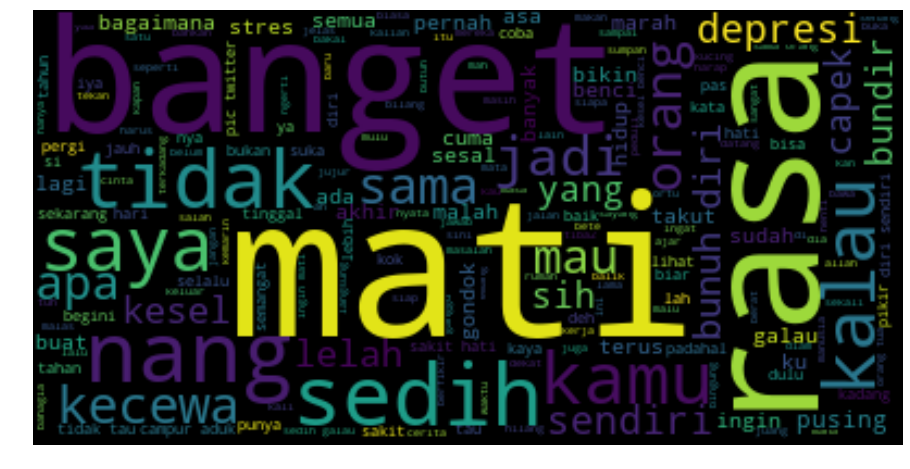

In [50]:
plot_word_cloud(data[data['is_depressed'] == True]['cleaned'])

## Word Cloud untuk Tweet yang Terdeteksi Healthy (Tidak Depresi)

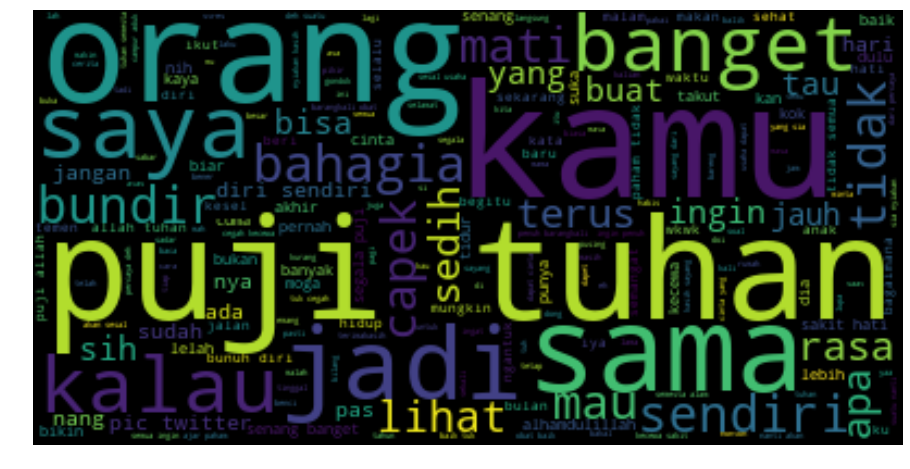

In [45]:
plot_word_cloud(data[data['is_depressed'] == False]['cleaned'])

## 3. Feature Extraction

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def extract_tf_idf(tweet_list):
    vectorizer = TfidfVectorizer(max_features=2000, min_df=5,) # inisiasi fungsi TF IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(np.array(tweet_list)).toarray()
    return tfidf_matrix

def extract_bag_of_words(tweet_list):
    vectorizer = CountVectorizer(max_features=2000, min_df=3, max_df=0.7)  
    return vectorizer.fit_transform(np.array(tweet_list)).toarray()

## 4. Classification

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

def classify(feature, label):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        LinearSVC()
    ]
    for classifier in classifiers:
        scores = cross_val_score(classifier, feature, label, cv=10)
        print("="*30)
        print(classifier.__class__.__name__)
        print('****Results****')
        print("Accuracy: %f (+/- %.2f)" % (scores.mean(), scores.std() * 2))
        print("="*30 + "\n")

In [48]:
classify(extract_tf_idf(cleaned), data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.641587 (+/- 0.22)

DecisionTreeClassifier
****Results****
Accuracy: 0.585361 (+/- 0.26)

LinearSVC
****Results****
Accuracy: 0.639078 (+/- 0.23)



In [49]:
classify(extract_bag_of_words(cleaned), data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.661651 (+/- 0.25)

DecisionTreeClassifier
****Results****
Accuracy: 0.574791 (+/- 0.27)

LinearSVC
****Results****
Accuracy: 0.629538 (+/- 0.23)

